In [2]:
## answer questions on data visualisation 
## quite a few visualisations 
## questions you would ask someone who has PCOS
    ## does it affect your menstrual cycle?


## input from users 
    ## know the preprocessing steps you used 
    ## need to convert raw data into a language your model understands 
    ## feed conversion into model 
    ## then will make prediction


In [3]:
## colours = #d0e1ff
#f7cac9
#92a8d1
#e6eeff
#ffecec

## PCOS 

some info about PCOS 
<br> <i> to fill </i>

<b> credits </b> 
<br> author = {Prasoon Kottarathil},
<br> title = {Polycystic ovary syndrome (PCOS)},
<br> year = {2020},
<br> publisher = {kaggle},
<br> journal = {Kaggle Dataset},
<br> how published = https://www.kaggle.com/prasoonkottarathil/polycystic-ovary-syndrome-pcos

<b> contents </b>
<br> * importing libraries, data loading and checking
<br> * data cleaning and pre-processing + feature engineering
<br> * model-building
<br> * measuring the accuracy of the models
<br> * saving and deploying the ML model 
<br> * exploratory data analysis


### Importing libraries, data loading and data checking

In [4]:
## import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import imblearn
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve



In [5]:
## load the data 
pcos = pd.read_csv("pcos.csv")
pcos_inf = pd.read_csv("PCOS_infertility.csv")


In [6]:
## lets take a look at the data 
pcos.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [7]:
pcos.tail()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
536,537,537,0,35,50.0,164.592,18.5,17,72,16,...,0.0,0,110,70,1,0,17.5,10.0,6.7,NaN
537,538,538,0,30,63.2,158.000,25.3,15,72,18,...,0.0,0,110,70,9,7,19.0,18.0,8.2,NaN
538,539,539,0,36,54.0,152.000,23.4,13,74,20,...,0.0,0,110,80,1,0,18.0,9.0,7.3,NaN
539,540,540,0,27,50.0,150.000,22.2,15,74,20,...,0.0,0,110,70,7,6,18.0,16.0,11.5,NaN
540,541,541,1,23,82.0,165.000,30.1,13,80,20,...,1.0,0,120,70,9,10,19.0,18.0,6.9,NaN


In [11]:
pcos["Avg. F size (L) (mm)"].unique()

array([18. , 15. , 16. , 17. , 14. , 20. , 19. ,  0. , 11. , 10. , 12. ,
       13. ,  6.5,  8. ,  9.5, 14.5,  5. , 11.5,  7.5, 10.5, 17.5, 15.5,
        9. , 18.5, 21. , 12.5,  2. , 22. , 24. ,  7. ,  6.8])

In [ ]:
## data info
pcos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [ ]:
pcos.shape

(541, 45)

### data cleaning and pre-processing + feature engineering

In [ ]:
## looking at missing values 
pcos.isnull().sum()

Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of aborptions           0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(

In [ ]:
## change object to float for II beta-HCG (mIU/mL) as has numeric values 
pcos["II    beta-HCG(mIU/mL)"] = pd.to_numeric(pcos["II    beta-HCG(mIU/mL)"], errors = "coerce")

In [ ]:
## change object to float for AMH (ng/ml) as has numeric values 
pcos["AMH(ng/mL)"] = pd.to_numeric(pcos["AMH(ng/mL)"], errors = "coerce")

In [ ]:
## replace marriage status null value and fast food null value 
pcos["Marraige Status (Yrs)"].fillna(pcos["Marraige Status (Yrs)"].median(), inplace=True)
pcos["Fast food (Y/N)"].fillna(pcos["Fast food (Y/N)"].median(),inplace = True)

In [ ]:
## replace II    beta-HCG(mIU/mL) and AMH(ng/mL) null values
pcos["II    beta-HCG(mIU/mL)"].fillna(pcos["II    beta-HCG(mIU/mL)"].median(), inplace=True)
pcos["AMH(ng/mL)"].fillna(pcos["AMH(ng/mL)"].median(),inplace = True)

In [ ]:
## checking for 0 values in columns apart from categorical columns 
count = (pcos[:] == 0).sum()
print(count)

Sl. No                      0
Patient File No.            0
PCOS (Y/N)                364
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          1
Marraige Status (Yrs)       1
Pregnant(Y/N)             335
No. of aborptions         437
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              1
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)          337
hair growth(Y/N)          393
Skin darkening (Y/N)      375
Hair loss(

In [ ]:
## are there any duplicated rows? 
pcos.duplicated().keep=False


In [ ]:
## drop the Unnamed:44 column 
pcos.drop("Unnamed: 44", axis=1, inplace=True)

In [ ]:
## are there any more missing values?
pcos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   541 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [ ]:
## merge the data 
pcos_data = pd.merge(pcos,pcos_inf, on='Patient File No.', suffixes=('','_y'),how='left')

In [ ]:
pcos_data.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Sl. No_y', 'PCOS (Y/N)_y', '  I   beta-HCG(mIU/mL)_y',
       'II    beta-HCG(mIU/mL)_y', 'AMH(ng/mL)_y'],
      dtype='object'

In [ ]:
## drop duplicated columns
pcos_data.drop(["Sl. No_y", "PCOS (Y/N)_y", "  I   beta-HCG(mIU/mL)_y", "II    beta-HCG(mIU/mL)_y", 'AMH(ng/mL)_y'], axis=1, inplace = True)

In [ ]:
pcos_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   541 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

the boxplots below and describe plot were used to check for outliers 
<br> where the max and mean numbers are far apart, with the mean being substantially smaller, shows the max as being an outlier. 

<Axes: >

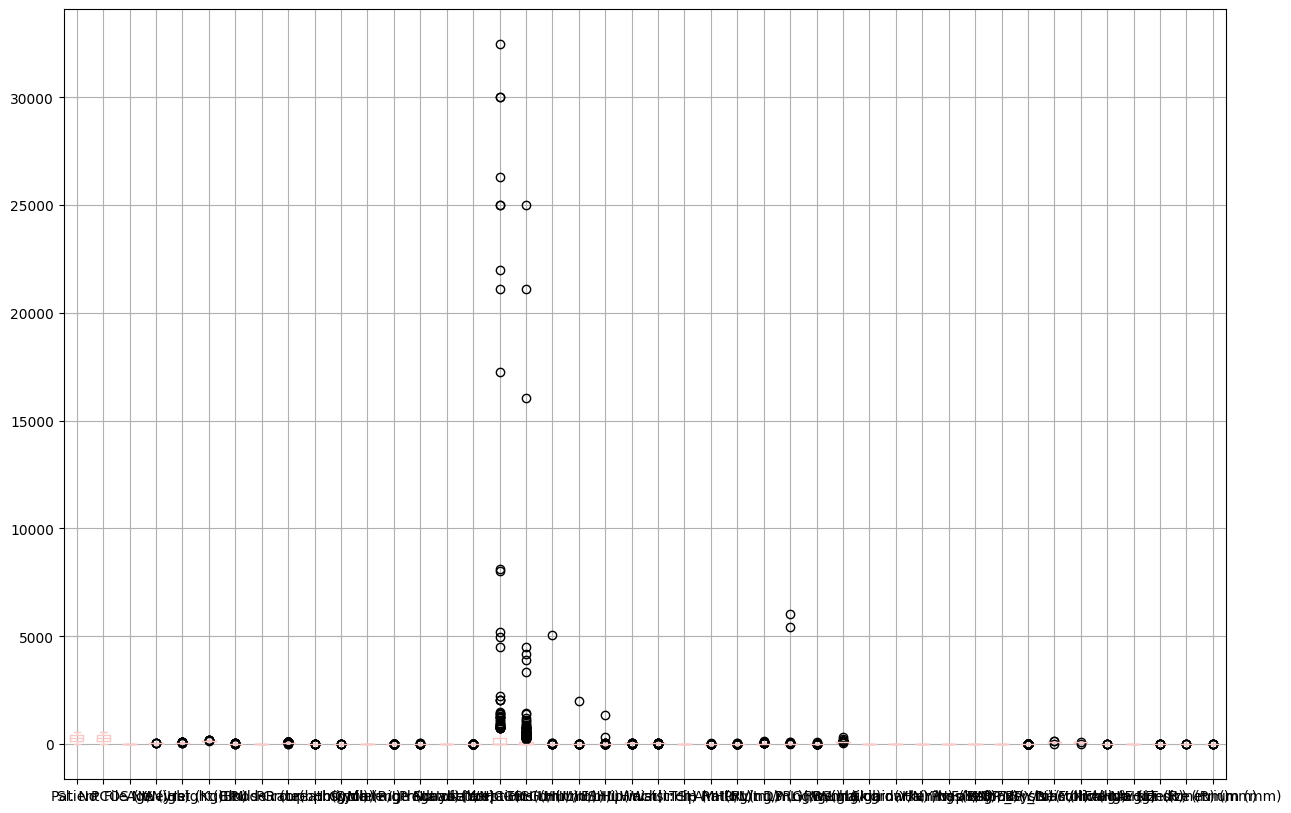

In [ ]:
## checking for outliers
pcos_data.boxplot(figsize=(15,10), color = "#f7cac9")

the following is the code for removing outliers in columns. 
<br> however, in health data outliers are a given and are what make data regarding health so valuable. 
<br> I felt, that removing outliers in this dataset would given an inaccurate analysis as the outliers are what make the analysis unique and invaluable. 
<br> Hence, the code is commented out and I decided not to use it. 

In [ ]:
""" columns = pcos_data.iloc[3:]
# Iterate over each column and remove outliers
for column in columns:
    max_threshold, min_threshold = pcos_data[column].quantile([0.75, 0.25])
    new_df = pcos_data[(pcos_data[column] > min_threshold) & (pcos_data[column] < max_threshold)]
    # Update the original DataFrame with the new values
    df = new_df.copy()
# Print the updated DataFrame
print(df) """ 

' columns = pcos_data.iloc[3:]\n# Iterate over each column and remove outliers\nfor column in columns:\n    max_threshold, min_threshold = pcos_data[column].quantile([0.75, 0.25])\n    new_df = pcos_data[(pcos_data[column] > min_threshold) & (pcos_data[column] < max_threshold)]\n    # Update the original DataFrame with the new values\n    df = new_df.copy()\n# Print the updated DataFrame\nprint(df) '

In [ ]:
## descriptive statistics of the data 
pcos_data.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.307579,13.802218,73.247689,19.243993,...,0.489834,0.515712,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.055129,1.840812,4.430285,1.688629,...,0.500359,0.500216,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.400000,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.600000,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.200000,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.600000,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [ ]:
## how many of the dataset have PCOS?
## there is a data imbalance 
pcos_data["PCOS (Y/N)"].value_counts()

PCOS (Y/N)
0    364
1    177
Name: count, dtype: int64

In [ ]:
## what is that as a proportion?
pcos_data["PCOS (Y/N)"].value_counts(normalize=True)

PCOS (Y/N)
0    0.672828
1    0.327172
Name: proportion, dtype: float64

In [ ]:
## what is the correlation between the variables and having PCOS? 
corr_pcos_data = pcos_data.corr(numeric_only=True)
corr_pcos_data

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
Sl. No,1.000000,1.000000,0.060998,0.067133,-0.082823,-0.011700,-0.082840,0.001705,-0.044533,-0.015196,...,0.160834,0.152615,0.000110,0.013399,0.009798,0.049658,0.086969,0.289706,0.244608,0.027219
Patient File No.,1.000000,1.000000,0.060998,0.067133,-0.082823,-0.011700,-0.082840,0.001705,-0.044533,-0.015196,...,0.160834,0.152615,0.000110,0.013399,0.009798,0.049658,0.086969,0.289706,0.244608,0.027219
PCOS (Y/N),0.060998,0.060998,1.000000,-0.168513,0.211938,0.068254,0.199697,0.036433,0.091821,0.036928,...,0.286077,0.376183,0.065337,0.007942,0.038032,0.603346,0.648327,0.132992,0.097690,0.106648
Age (yrs),0.067133,0.067133,-0.168513,1.000000,-0.029734,-0.119819,0.021372,-0.010954,0.045831,0.087382,...,-0.032921,-0.039108,-0.025911,0.073587,0.066788,-0.110793,-0.159395,-0.016352,-0.079250,-0.104238
Weight (Kg),-0.082823,-0.082823,0.211938,-0.029734,1.000000,0.420098,0.901688,0.072682,0.019983,0.043614,...,0.063983,0.160774,-0.068236,0.027608,0.131402,0.173751,0.124290,-0.021368,-0.073207,-0.010100
Height(Cm),-0.011700,-0.011700,0.068254,-0.119819,0.420098,1.000000,-0.006845,0.040825,-0.074339,-0.029459,...,0.061129,0.032839,0.012943,-0.067959,0.011116,0.106189,0.075358,-0.026705,0.059426,-0.054035
BMI,-0.082840,-0.082840,0.199697,0.021372,0.901688,-0.006845,1.000000,0.061328,0.050507,0.061579,...,0.045535,0.157744,-0.080660,0.069737,0.140062,0.143110,0.104425,-0.011736,-0.111427,0.009327
Blood Group,0.001705,0.001705,0.036433,-0.010954,0.072682,0.040825,0.061328,1.000000,0.047572,-0.023766,...,0.039029,-0.035836,0.064035,0.030898,0.054014,0.061332,0.013974,-0.035667,-0.015725,-0.015335
Pulse rate(bpm),-0.044533,-0.044533,0.091821,0.045831,0.019983,-0.074339,0.050507,0.047572,1.000000,0.303804,...,-0.003039,0.059242,-0.038881,-0.025510,0.007623,0.040390,0.049182,-0.048356,-0.034202,-0.041241
RR (breaths/min),-0.015196,-0.015196,0.036928,0.087382,0.043614,-0.029459,0.061579,-0.023766,0.303804,1.000000,...,0.029242,0.137957,-0.047451,0.017323,0.052631,0.069731,0.012441,-0.031051,-0.021893,-0.063930


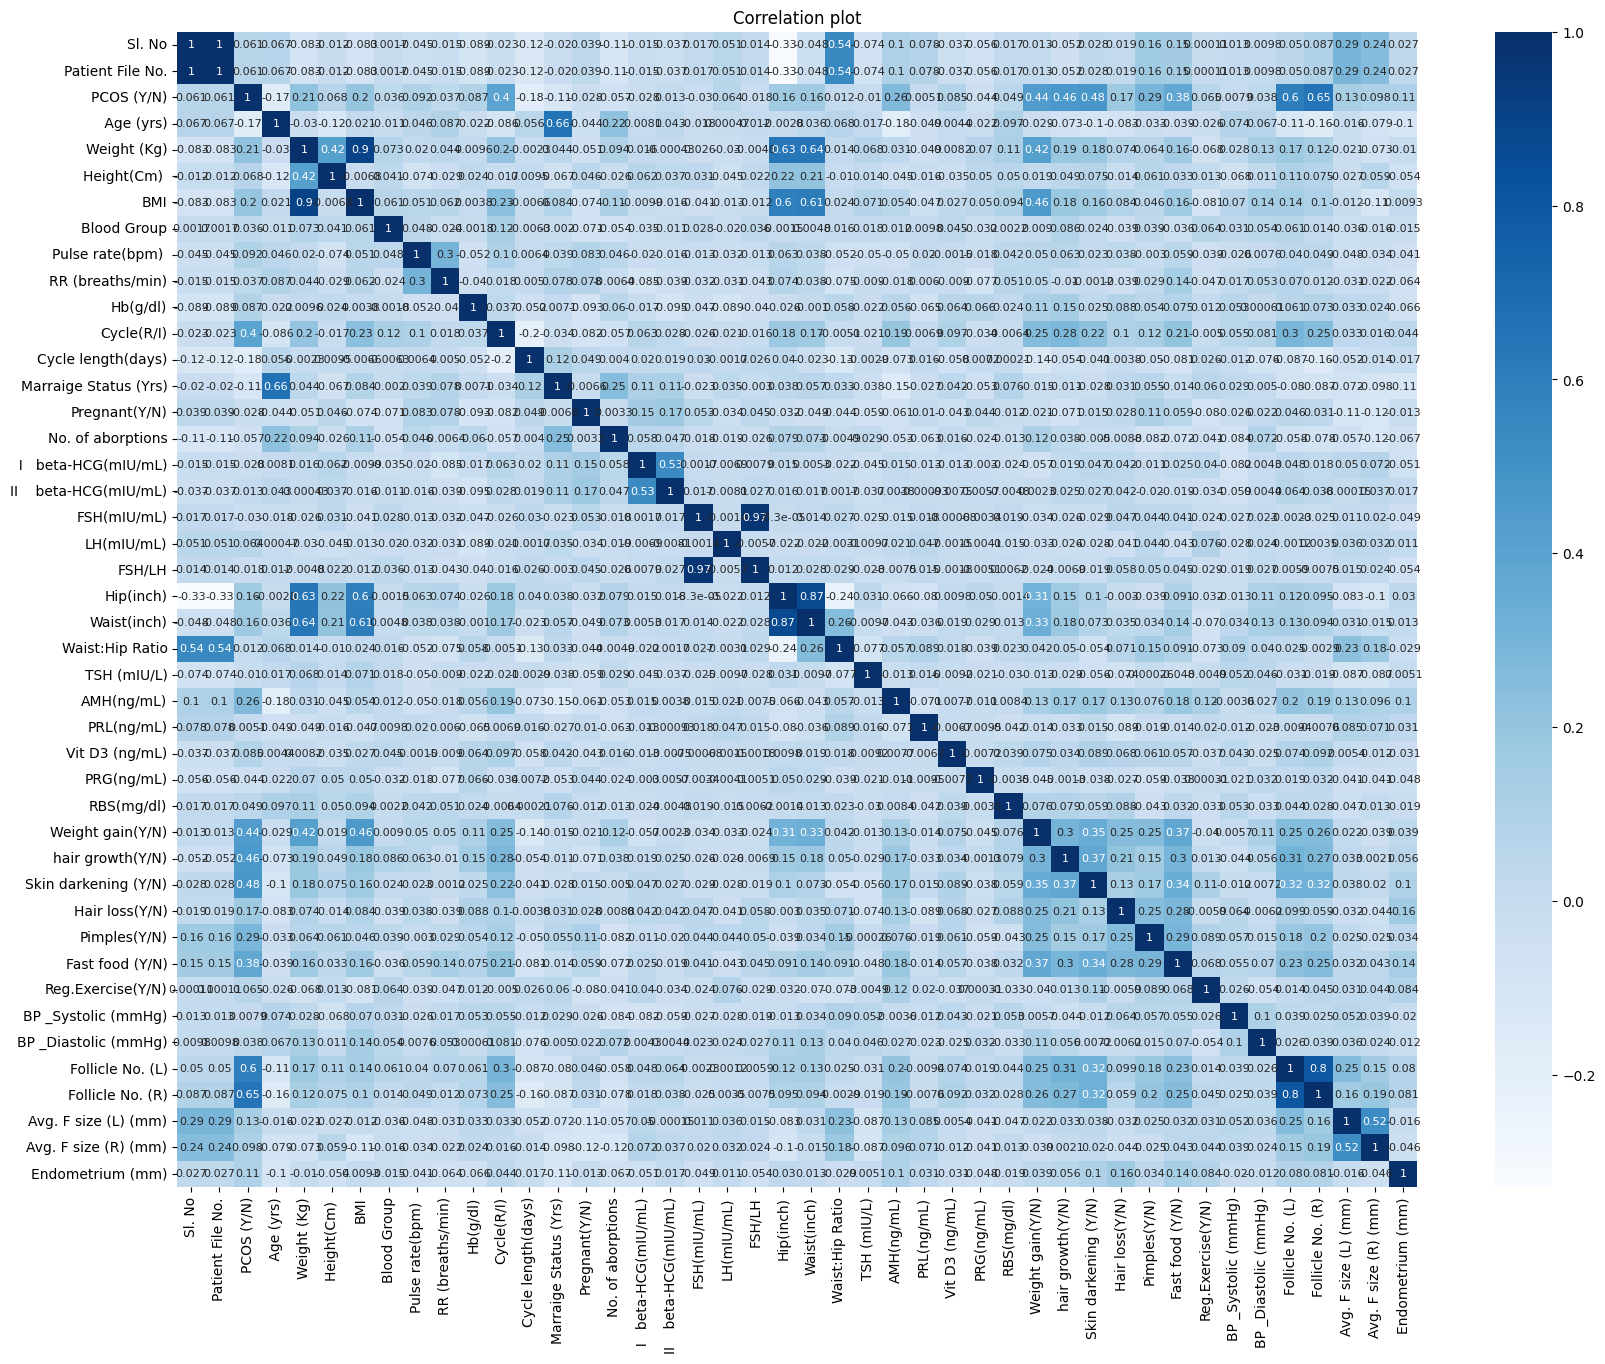

In [ ]:
## heatmap 
plt.figure(figsize=(20,15))
sns.heatmap(corr_pcos_data, annot= True, cmap= "Blues", annot_kws={"size" : 8}) 
plt.title('Correlation plot', loc = "center")
plt.show()
%config InlineBackend.figure_format='retina'

in the below code, values which correlate the most are taken. In this case, with correlation of >0.1. This was an initial 17 values taken for the model, with a view to change if affecting model accuracy. 

In [ ]:
## Making it easier to see how all the features correlate with PCOS 
corr_pcos_data["PCOS (Y/N)"].sort_values(ascending=False).head(17)

PCOS (Y/N)              1.000000
Follicle No. (R)        0.648327
Follicle No. (L)        0.603346
Skin darkening (Y/N)    0.475733
hair growth(Y/N)        0.464667
Weight gain(Y/N)        0.441047
Cycle(R/I)              0.401644
Fast food (Y/N)         0.376183
Pimples(Y/N)            0.286077
AMH(ng/mL)              0.264141
Weight (Kg)             0.211938
BMI                     0.199697
Hair loss(Y/N)          0.172879
Waist(inch)             0.164598
Hip(inch)               0.162297
Avg. F size (L) (mm)    0.132992
Endometrium (mm)        0.106648
Name: PCOS (Y/N), dtype: float64

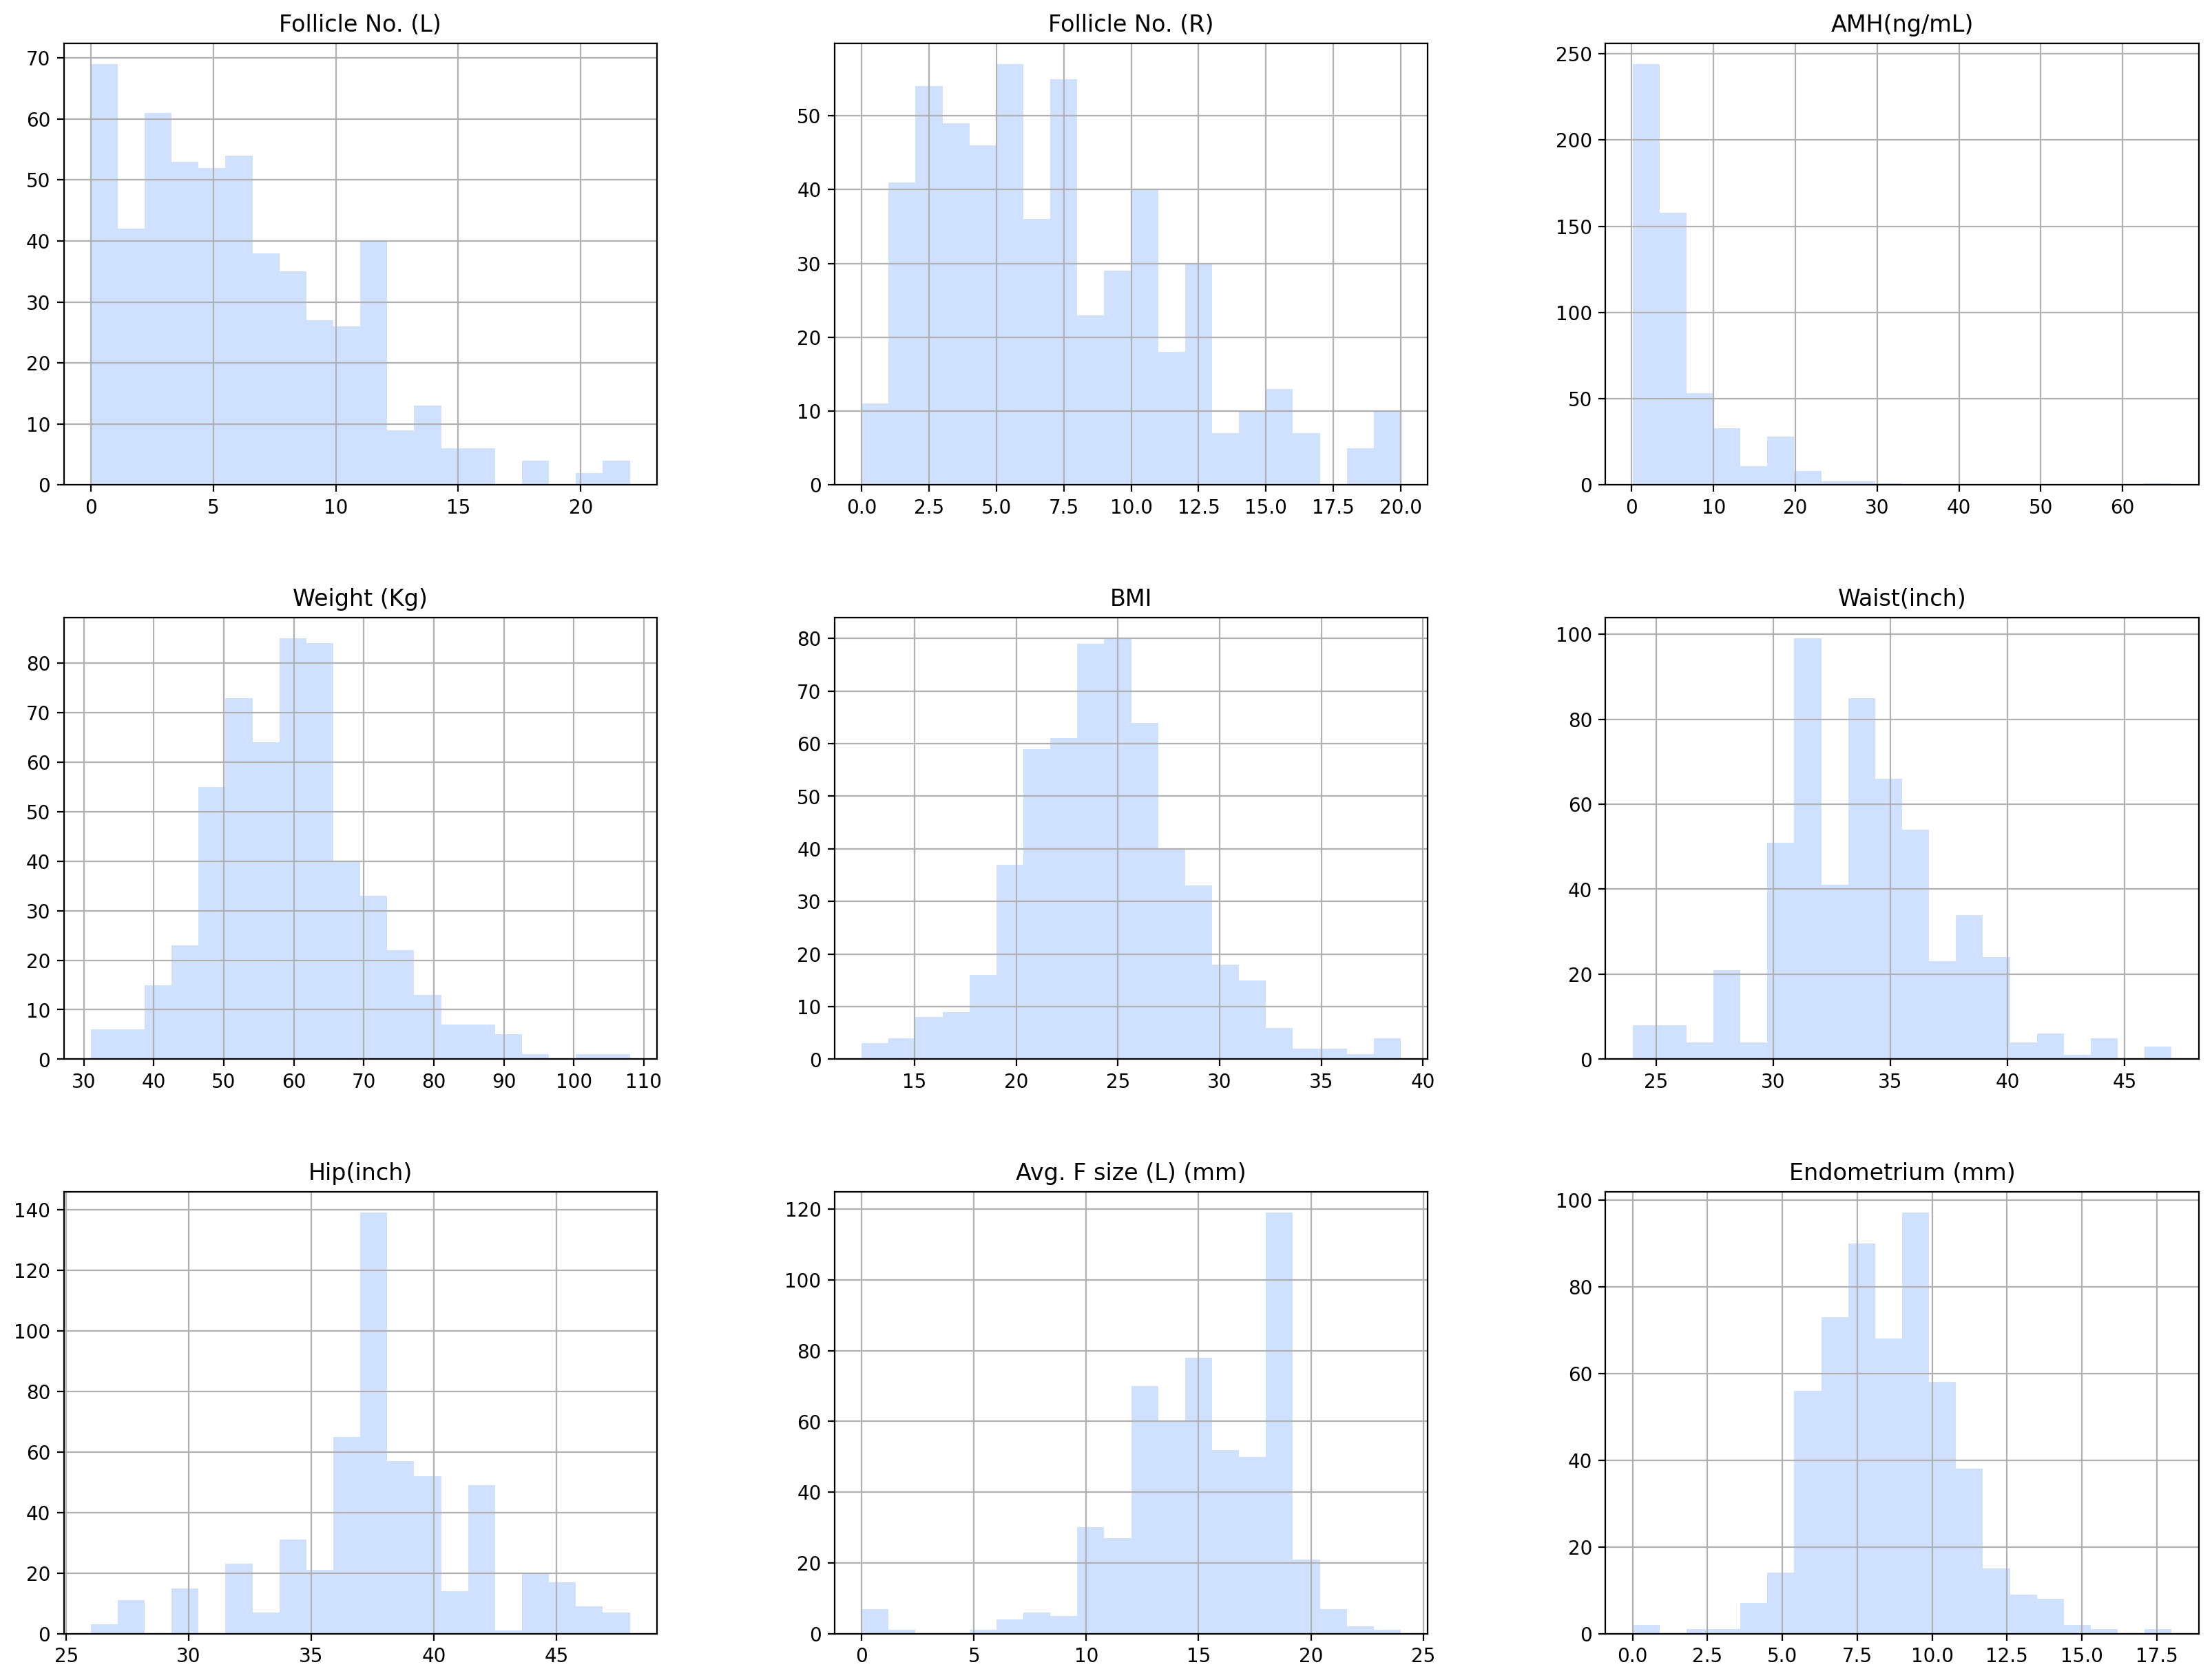

In [ ]:
## what is the skew of the data? (only numerical data)
pcos_data.hist(column=["Follicle No. (L)", "Follicle No. (R)", "AMH(ng/mL)", "Weight (Kg)", "BMI", "Waist(inch)", "Hip(inch)", "Avg. F size (L) (mm)", "Endometrium (mm)"], bins=20, figsize=(20, 15), color = "#d0e1ff")
plt.show(block=False)

The skew of the data from AMH (ng/mL) would benefit from log transformation 

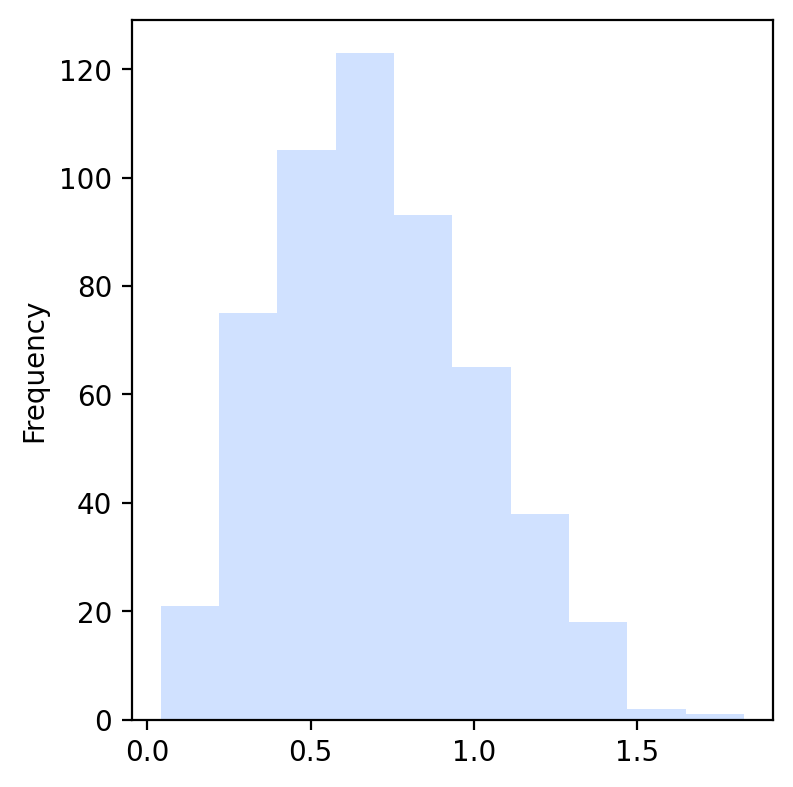

In [ ]:
log_var = ["AMH(ng/mL)"]

fig = plt.figure(figsize = (24, 10))

for j in range (len (log_var)):
    var = log_var[j]
    transformed = "log_" + var
    pcos_data[transformed] = np.log10(pcos_data [var]+1)
    sub = fig.add_subplot(2, 5, j + 1)
    sub.set_xlabel (var)
    pcos_data[transformed].plot(kind = 'hist', color = "#d0e1ff")

plt.show()

#log_AMH(ng/mL)

### Model building

In [ ]:
pcos_data.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),log_AMH(ng/mL)
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,0.487138
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,0.403121
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,0.882525
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,0.346353
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,0.513218


here - the models were tried with data (x) with a correlation of >0.1 and the top 10 and top 8 most highly correlated values. There was no significant difference between trying with only the top 10 highly correlated values and top 8 highly correlated values rather than with all 16 data with correlations of >0.1. The decision was made to keep all 16. 

In [ ]:
## selecting the independant and dependant variable 
x = pcos_data[["Follicle No. (R)", "Follicle No. (L)", "Skin darkening (Y/N)", 
               "hair growth(Y/N)", "Weight gain(Y/N)", "Cycle(R/I)", "Fast food (Y/N)", "Pimples(Y/N)", "log_AMH(ng/mL)", "Weight (Kg)", "BMI", 
               "Hair loss(Y/N)", "Waist(inch)", "Hip(inch)", "Avg. F size (L) (mm)", "Endometrium (mm)"]].values 
y = pcos_data.iloc[:, 2].values

In [ ]:
x

array([[ 3. ,  3. ,  0. , ..., 36. , 18. ,  8.5],
       [ 5. ,  3. ,  0. , ..., 38. , 15. ,  3.7],
       [15. , 13. ,  0. , ..., 40. , 18. , 10. ],
       ...,
       [ 0. ,  1. ,  0. , ..., 30. , 18. ,  7.3],
       [ 6. ,  7. ,  0. , ..., 28. , 18. , 11.5],
       [10. ,  9. ,  1. , ..., 48. , 19. ,  6.9]])

the models were tried before and after oversampling, and after oversampling a higher accuracy + AUC score was gained. 

In [ ]:
## oversampling
from imblearn.over_sampling import RandomOverSampler 
oversample = RandomOverSampler(sampling_strategy="minority")
x, y = x, y = oversample.fit_resample(x, y)

In [ ]:
## split the data into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 32)

In [ ]:
## standardisation 
## input data is transformed to have a mean of 0 and variance of 1 
## dont fit x_test only transform so no overfitting 
scaler_x = StandardScaler()
x_train = scaler_x.fit_transform(x_train)
x_test = scaler_x.transform(x_test)

#### Logistic Regression

In [ ]:
## logistic regression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
## make prediction 
y_pred_log = log_reg.predict(x_test)
y_pred_log

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1])

In [ ]:
## get the result in a dataframe 
result = {"Actual":y_test, "Predicted": y_pred_log}
result_df = pd.DataFrame(result)
result_df

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
141,1,1
142,1,1
143,0,0
144,0,0


In [ ]:
## evaluate the model accuracy
accuracy_LR = accuracy_score(y_test, y_pred_log)

## CONFUSION MATRIX
conf_mat_lr = confusion_matrix(y_test, y_pred_log)

print(accuracy_LR)
print(conf_mat_lr)

0.910958904109589
[[69  9]
 [ 4 64]]


In [ ]:
## classification report
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91        78
           1       0.88      0.94      0.91        68

    accuracy                           0.91       146
   macro avg       0.91      0.91      0.91       146
weighted avg       0.91      0.91      0.91       146



AUC: 0.91


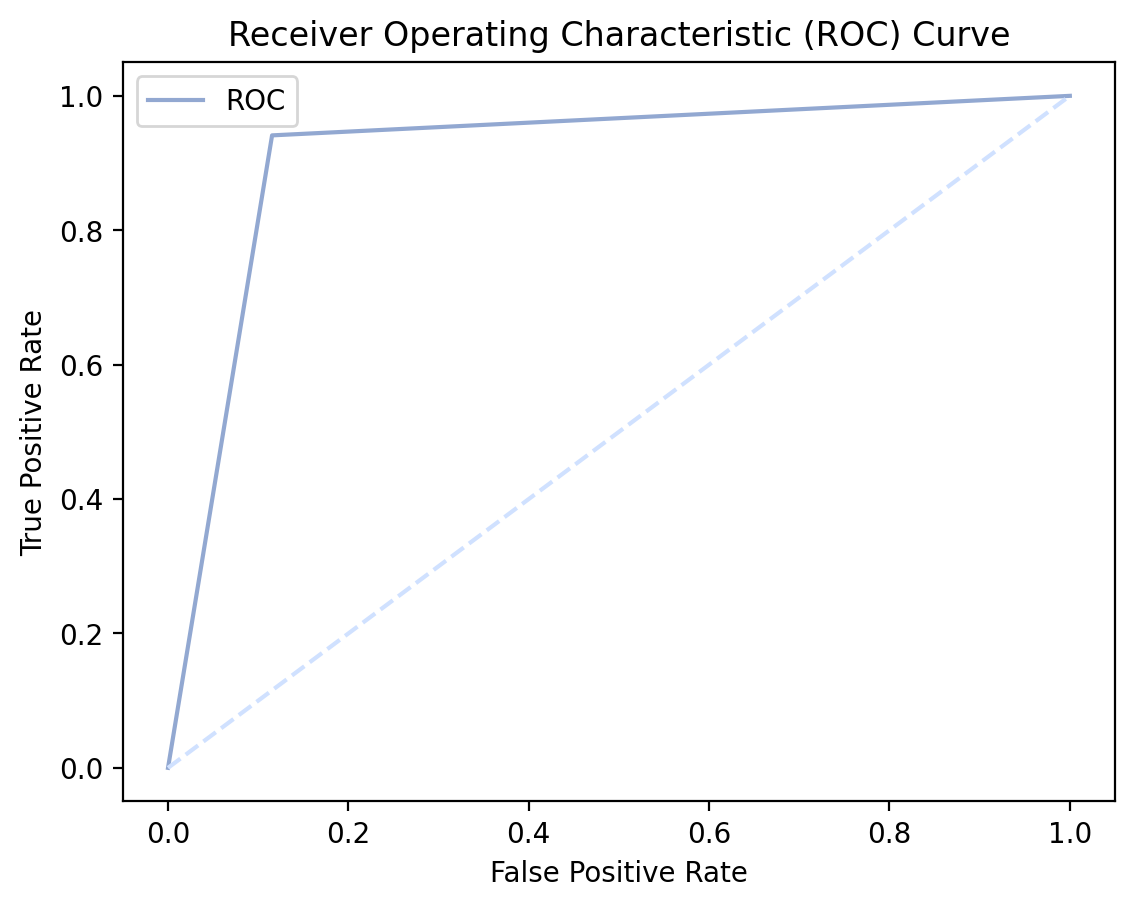

In [ ]:
## roc curve
auc_mod1 = roc_auc_score(y_test, y_pred_log)
print('AUC: %.2f' %auc_mod1)

fpr, tpr, _ = roc_curve(y_test, y_pred_log)
plt.plot(fpr, tpr, color='#92a8d1', label='ROC')
plt.plot([0, 1], [0, 1], color='#d0e1ff', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### Naive Bayes 

In [ ]:
## create our naive bayes gaussian model 
gaussian_model = GaussianNB()
## train our model 
gaussian_model.fit(x_train,y_train)

GaussianNB()

In [ ]:
## make prediction 
y_pred_nb = gaussian_model.predict(x_test)

In [ ]:
## get the result in a dataframe 
result = {"Actual":y_test, "Predicted": y_pred_nb}
result_df = pd.DataFrame(result)
result_df

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
141,1,1
142,1,1
143,0,0
144,0,0


In [ ]:
## evaluate the model accuracy
accuracy_NB = accuracy_score(y_test, y_pred_nb)

## CONFUSION MATRIX
conf_mat_nb = confusion_matrix(y_test, y_pred_nb)

print(accuracy_NB)
print(conf_mat_nb)

0.8767123287671232
[[67 11]
 [ 7 61]]


In [ ]:
## classification report
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88        78
           1       0.85      0.90      0.87        68

    accuracy                           0.88       146
   macro avg       0.88      0.88      0.88       146
weighted avg       0.88      0.88      0.88       146



AUC: 0.878017


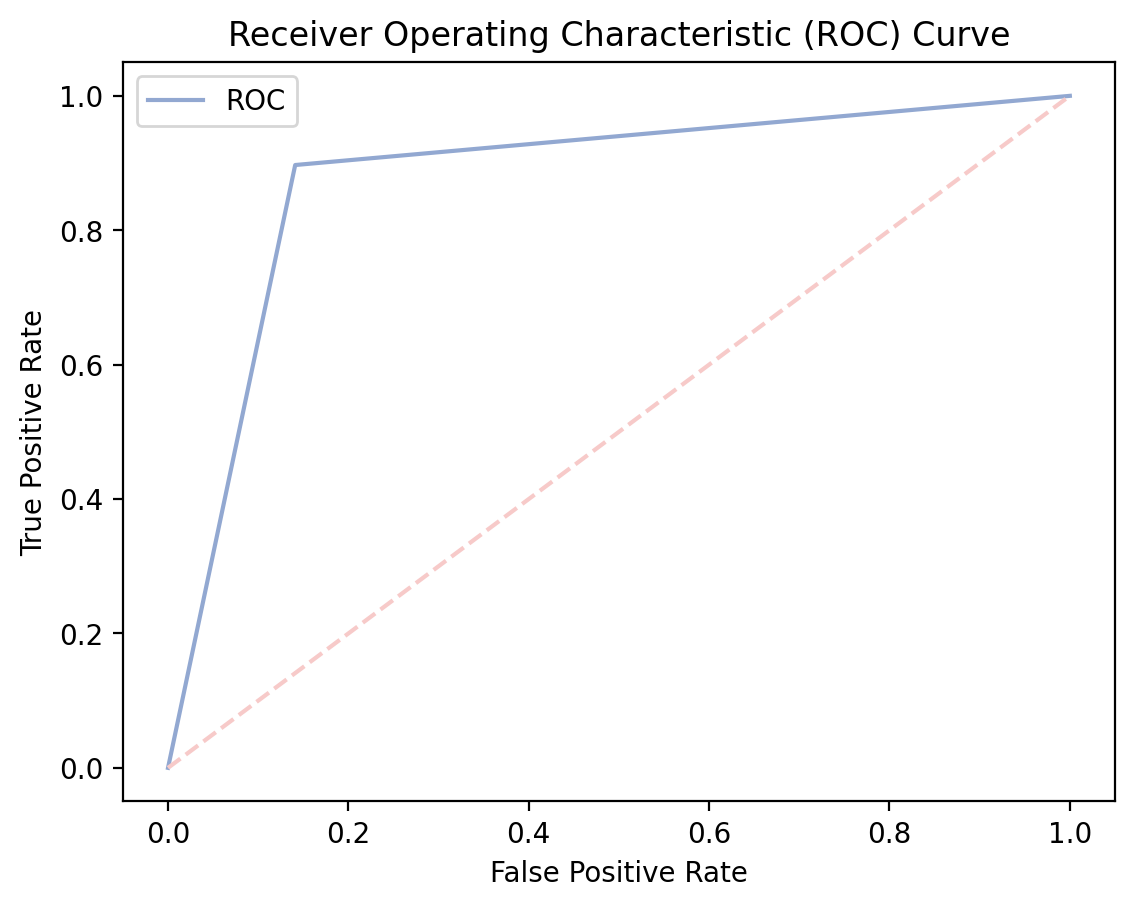

In [ ]:
## roc curve
auc_mod2 = roc_auc_score(y_test, y_pred_nb)
print('AUC: %f' %auc_mod2)

fpr, tpr, _ = roc_curve(y_test, y_pred_nb)
plt.plot(fpr, tpr, color='#92a8d1', label='ROC')
plt.plot([0, 1], [0, 1], color='#f7cac9', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### K-Nearest Neighbours

In [ ]:
## fit our knn model
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
## make prediction
y_pred_knn = knn_model.predict(x_test)

In [ ]:
## evaluate the model accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)

## CONFUSION MATRIX
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)

print(accuracy_knn)
print(conf_mat_knn)

0.9178082191780822
[[75  3]
 [ 9 59]]


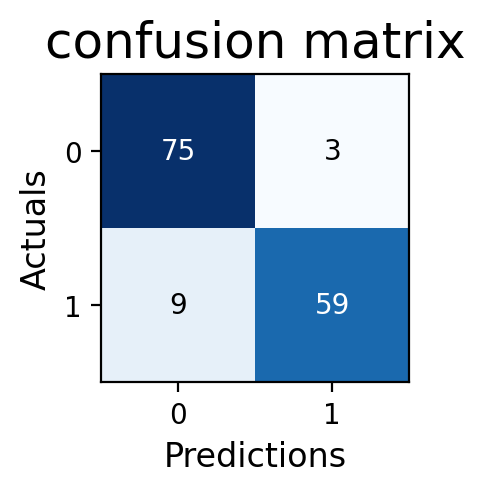

In [ ]:
## confusion matrix plot
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_mat_knn, figsize=(2,2), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize = 12)
plt.ylabel('Actuals', fontsize = 12)
plt.title('confusion matrix', fontsize = 18)
plt.show()

In [ ]:
## classification report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93        78
           1       0.95      0.87      0.91        68

    accuracy                           0.92       146
   macro avg       0.92      0.91      0.92       146
weighted avg       0.92      0.92      0.92       146



AUC: 0.914593


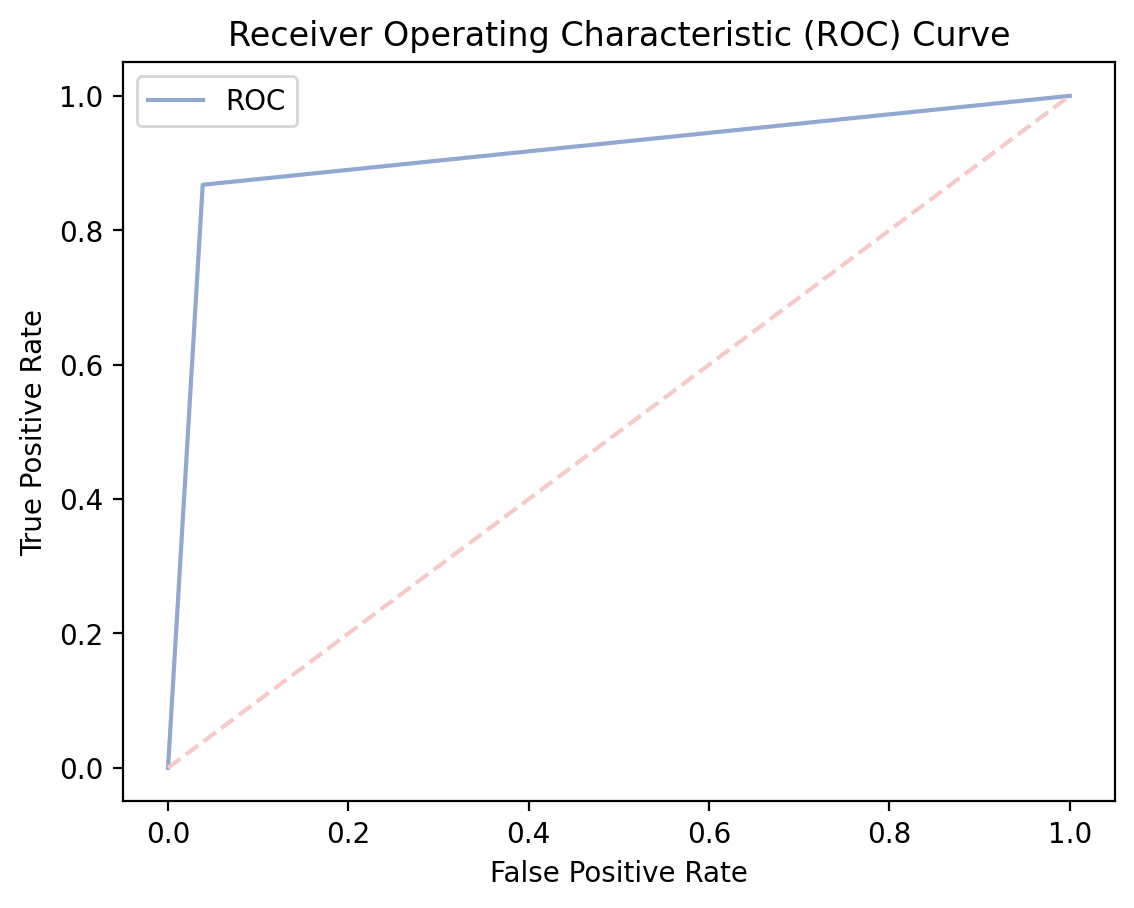

In [ ]:
## roc curve
auc_mod3 = roc_auc_score(y_test, y_pred_knn)
print('AUC: %f' %auc_mod3)

fpr, tpr, _ = roc_curve(y_test, y_pred_knn)
plt.plot(fpr, tpr, color='#92a8d1', label='ROC')
plt.plot([0, 1], [0, 1], color='#f7cac9', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### Decision Trees

In [ ]:
## decision tree model
decisiontree_gini = DecisionTreeClassifier()
## use max depth
decisiontree_depth = DecisionTreeClassifier(max_depth=4)
##use entropy criterion
decisiontree_entropy =DecisionTreeClassifier(criterion='entropy')

In [ ]:
## fit the trees
decisiontree_gini.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
decisiontree_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
decisiontree_depth.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
## make prediction
y_pred_gini = decisiontree_gini.predict(x_test)

In [ ]:
y_pred_entropy = decisiontree_entropy.predict(x_test)

In [ ]:
y_pred_depth = decisiontree_depth.predict(x_test)

In [ ]:
print('Accuracy (gini):', metrics.accuracy_score(y_test, y_pred_gini))
accuracy_gini = metrics.accuracy_score(y_test, y_pred_gini)
print('Accuracy (enthropy):', metrics.accuracy_score(y_test, y_pred_entropy))
accuracy_entropy = metrics.accuracy_score(y_test, y_pred_entropy)
print('Accuracy (maxdepth):', metrics.accuracy_score(y_test, y_pred_depth))
accuracy_depth = metrics.accuracy_score(y_test, y_pred_depth)

Accuracy (gini): 0.863013698630137
Accuracy (enthropy): 0.9315068493150684
Accuracy (maxdepth): 0.821917808219178


In [ ]:
## classification report
print(classification_report(y_test, y_pred_gini))


              precision    recall  f1-score   support

           0       0.91      0.82      0.86        78
           1       0.82      0.91      0.86        68

    accuracy                           0.86       146
   macro avg       0.87      0.87      0.86       146
weighted avg       0.87      0.86      0.86       146



AUC: 0.866139


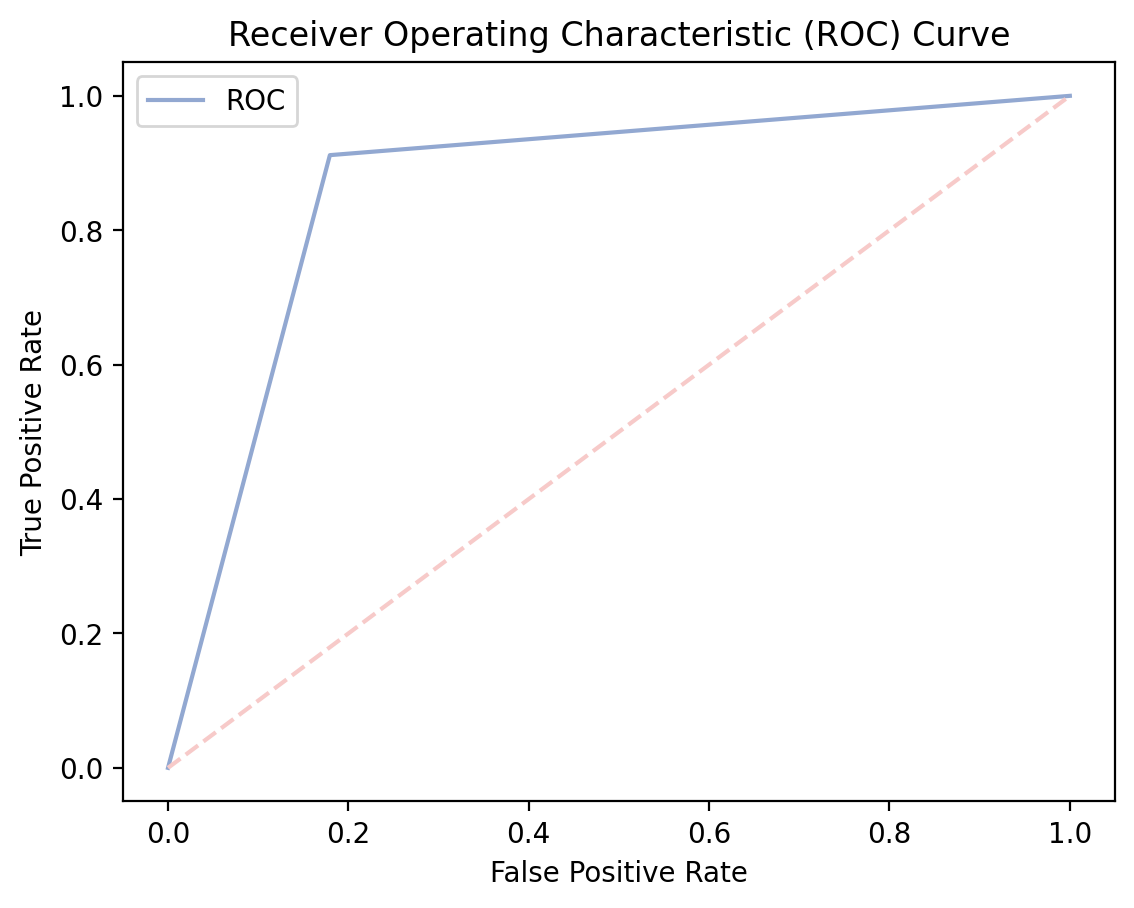

In [ ]:
## roc curve
auc_mod4 = roc_auc_score(y_test, y_pred_gini)
print('AUC: %f' %auc_mod4)

fpr, tpr, _ = roc_curve(y_test, y_pred_gini)
plt.plot(fpr, tpr, color='#92a8d1', label='ROC')
plt.plot([0, 1], [0, 1], color='#f7cac9', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_entropy))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        78
           1       0.87      1.00      0.93        68

    accuracy                           0.93       146
   macro avg       0.94      0.94      0.93       146
weighted avg       0.94      0.93      0.93       146



AUC: 0.935897


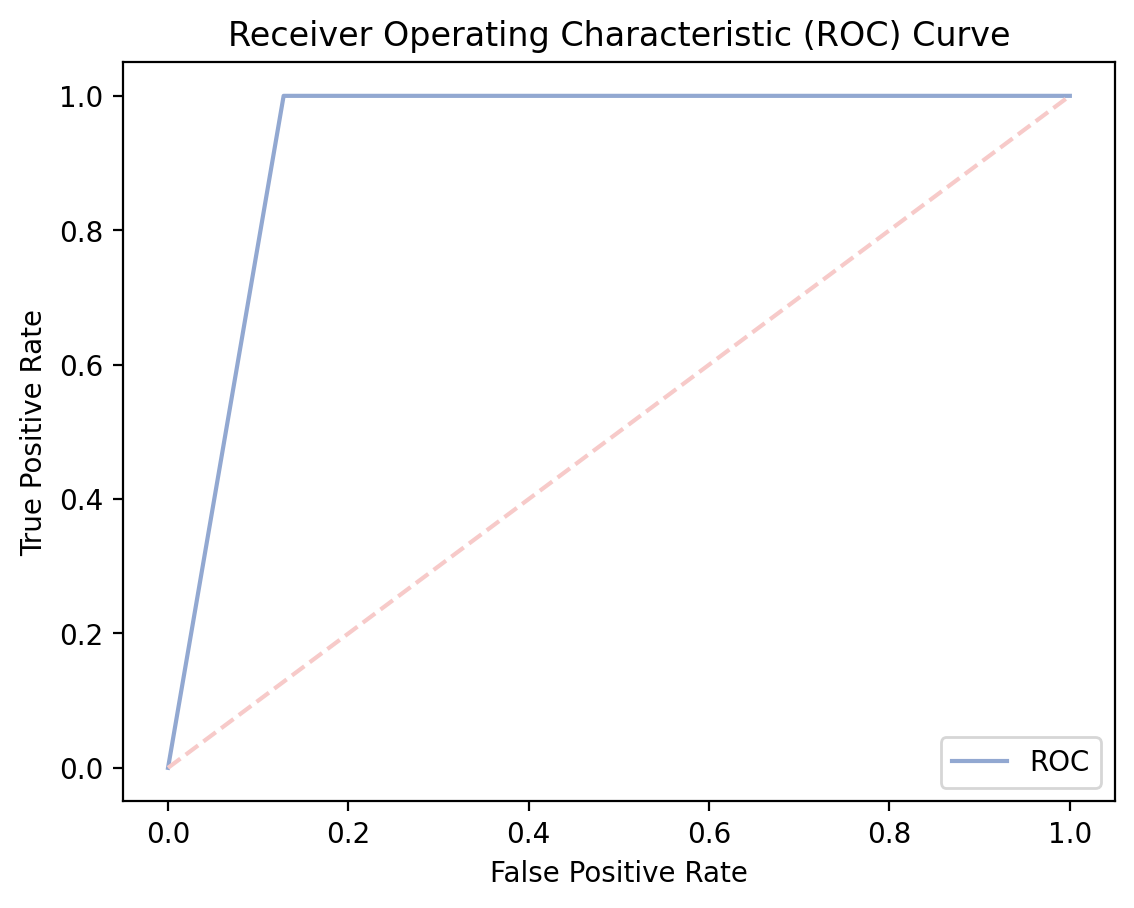

In [ ]:
## roc curve
auc_mod5 = roc_auc_score(y_test, y_pred_entropy)
print('AUC: %f' %auc_mod5)

fpr, tpr, _ = roc_curve(y_test, y_pred_entropy)
plt.plot(fpr, tpr, color='#92a8d1', label='ROC')
plt.plot([0, 1], [0, 1], color='#f7cac9', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
## classification report
print(classification_report(y_test, y_pred_depth))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82        78
           1       0.76      0.90      0.82        68

    accuracy                           0.82       146
   macro avg       0.83      0.83      0.82       146
weighted avg       0.83      0.82      0.82       146



AUC: 0.826735


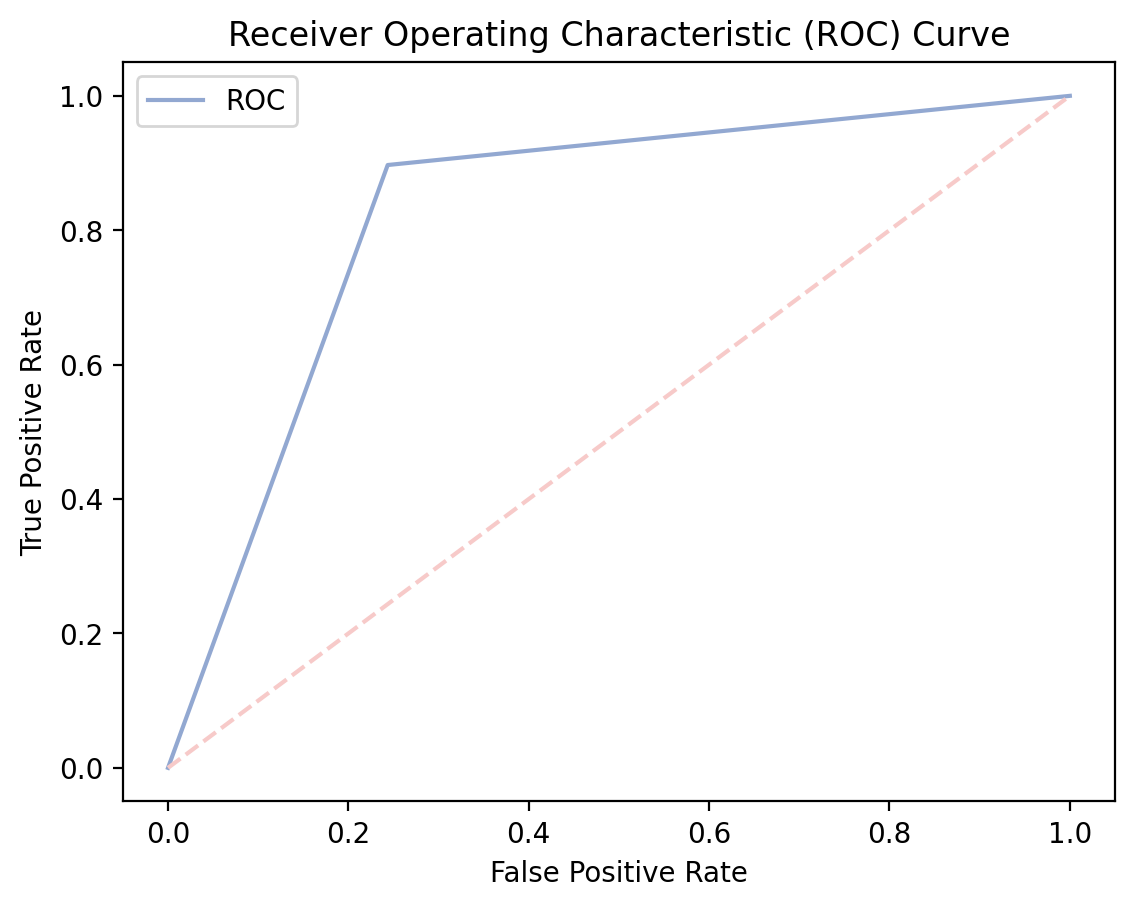

In [ ]:
## roc curve
auc_mod6 = roc_auc_score(y_test, y_pred_depth)
print('AUC: %f' %auc_mod6)

fpr, tpr, _ = roc_curve(y_test, y_pred_depth)
plt.plot(fpr, tpr, color='#92a8d1', label='ROC')
plt.plot([0, 1], [0, 1], color='#f7cac9', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### SVM

In [ ]:
## create an object for svm
clfLinear = svm.SVC(kernel='linear')
clfsigmoid = svm.SVC(kernel='sigmoid')
clfrbf = svm.SVC(kernel='rbf')

In [ ]:
## train the model 
clfLinear.fit(x_train, y_train)
clfsigmoid.fit(x_train, y_train)
clfrbf.fit(x_train, y_train)

SVC()

In [ ]:
## make prediction
y_pred_linear = clfLinear.predict(x_test)
y_pred_sigmoid = clfsigmoid.predict(x_test)
y_pred_rbf = clfrbf.predict(x_test)

In [ ]:
## model accuracy
print('Accuracy (linear):', metrics.accuracy_score(y_test, y_pred_linear))
accuracy_linear = metrics.accuracy_score(y_test, y_pred_linear)
print('Accuracy (sigmoid):', metrics.accuracy_score(y_test, y_pred_sigmoid))
accuracy_sigmoid = metrics.accuracy_score(y_test, y_pred_sigmoid)
print('Accuracy (rbf):', metrics.accuracy_score(y_test, y_pred_rbf))
accuracy_rbf = metrics.accuracy_score(y_test, y_pred_rbf)

Accuracy (linear): 0.8835616438356164
Accuracy (sigmoid): 0.8493150684931506
Accuracy (rbf): 0.9178082191780822


In [ ]:
## classification report
print(classification_report(y_test, y_pred_linear))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        78
           1       0.85      0.91      0.88        68

    accuracy                           0.88       146
   macro avg       0.88      0.89      0.88       146
weighted avg       0.89      0.88      0.88       146



AUC: 0.885370


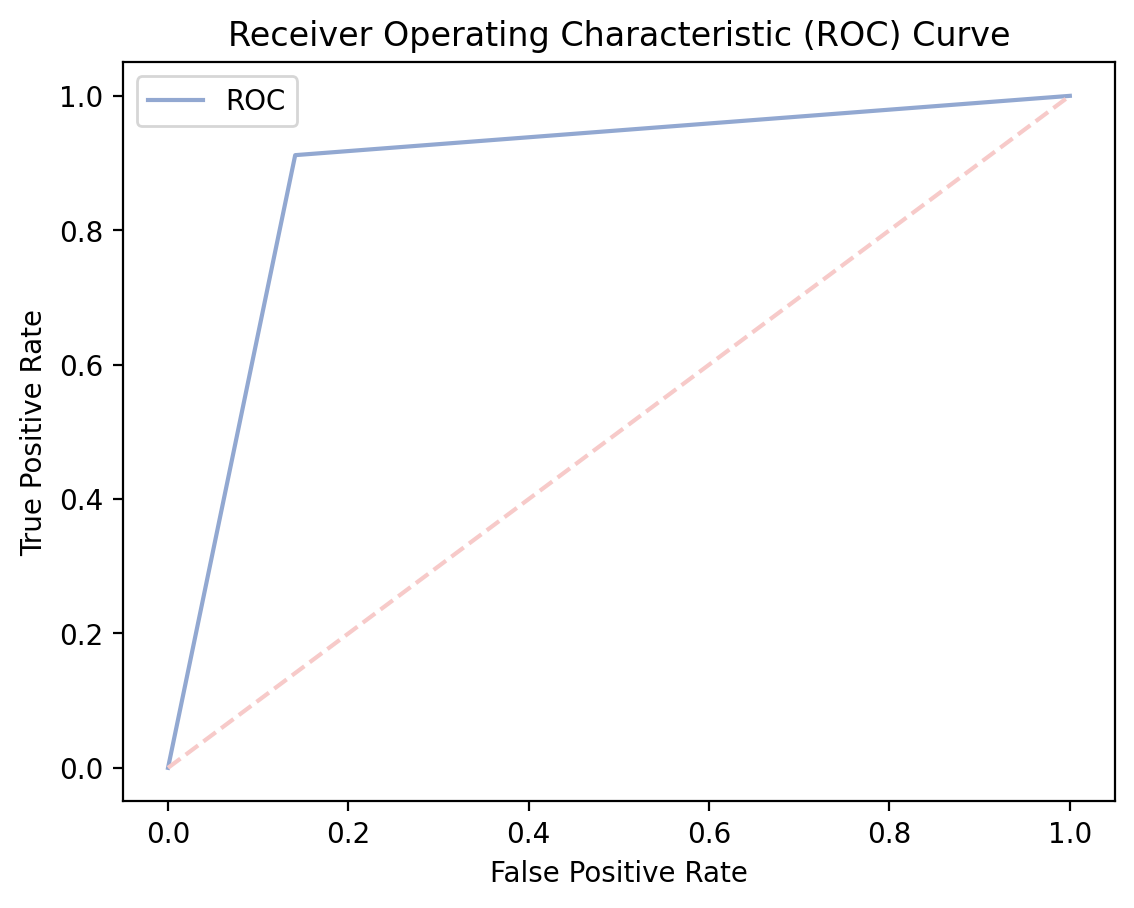

In [ ]:
## roc curve
auc_mod7 = roc_auc_score(y_test, y_pred_linear)
print('AUC: %f' %auc_mod7)

fpr, tpr, _ = roc_curve(y_test, y_pred_linear)
plt.plot(fpr, tpr, color='#92a8d1', label='ROC')
plt.plot([0, 1], [0, 1], color='#f7cac9', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
## classification report
print(classification_report(y_test, y_pred_sigmoid))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85        78
           1       0.81      0.88      0.85        68

    accuracy                           0.85       146
   macro avg       0.85      0.85      0.85       146
weighted avg       0.85      0.85      0.85       146



AUC: 0.851433


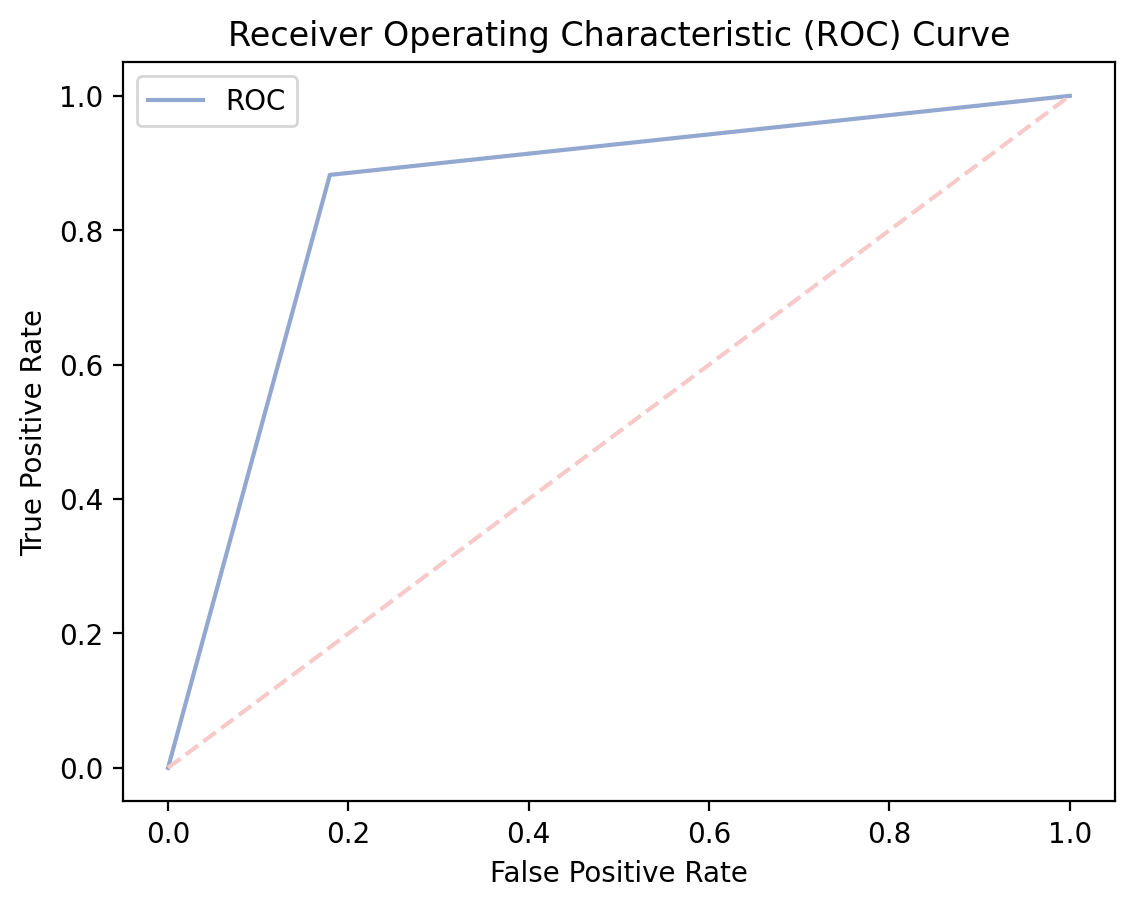

In [ ]:
## roc curve
auc_mod8 = roc_auc_score(y_test, y_pred_sigmoid)
print('AUC: %f' %auc_mod8)

fpr, tpr, _ = roc_curve(y_test, y_pred_sigmoid)
plt.plot(fpr, tpr, color='#92a8d1', label='ROC')
plt.plot([0, 1], [0, 1], color='#f7cac9', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
## classification report
print(classification_report(y_test, y_pred_rbf))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        78
           1       0.88      0.96      0.92        68

    accuracy                           0.92       146
   macro avg       0.92      0.92      0.92       146
weighted avg       0.92      0.92      0.92       146



AUC: 0.920249


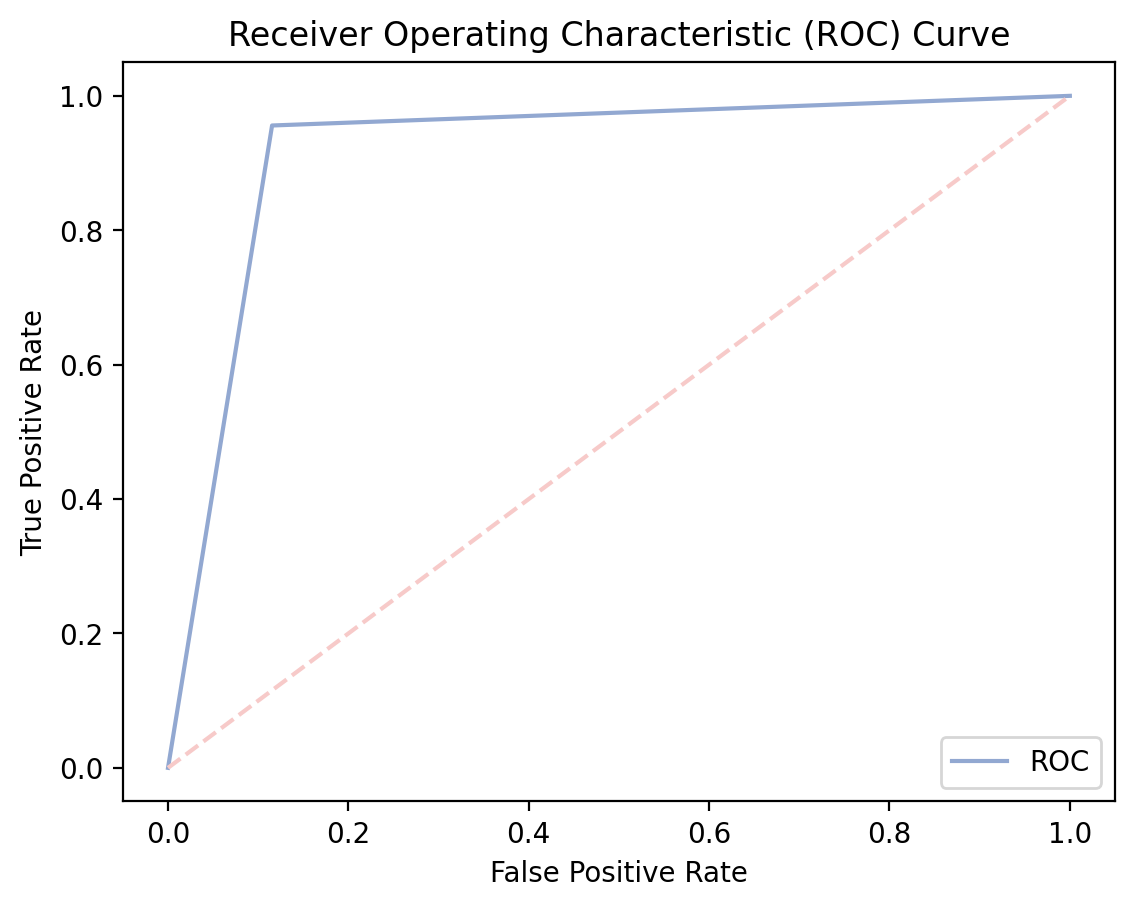

In [ ]:
## roc curve
auc_mod9 = roc_auc_score(y_test, y_pred_rbf)
print('AUC: %f' %auc_mod9)

fpr, tpr, _ = roc_curve(y_test, y_pred_rbf)
plt.plot(fpr, tpr, color='#92a8d1', label='ROC')
plt.plot([0, 1], [0, 1], color='#f7cac9', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### Random forest 

In [ ]:
## random forest classifier 
ran_for = RandomForestClassifier()
ran_for.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
## make prediction 
y_pred_ran = ran_for.predict(x_test)
y_pred_ran

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1])

In [ ]:
## get the result in a dataframe 
result = {"Actual":y_test, "Predicted": y_pred_ran}
result_df = pd.DataFrame(result)
result_df

,Actual,Predicted
0,1,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
141,1,1
142,1,1
143,0,0
144,0,0


In [ ]:
## evaluate the model accuracy
accuracy_RF = accuracy_score(y_test, y_pred_ran)

## CONFUSION MATRIX
conf_mat_rf = confusion_matrix(y_test, y_pred_ran)

print(accuracy_RF)
print(conf_mat_rf)

0.9452054794520548
[[72  6]
 [ 2 66]]


In [ ]:
## classification report
print(classification_report(y_test, y_pred_ran))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95        78
           1       0.92      0.97      0.94        68

    accuracy                           0.95       146
   macro avg       0.94      0.95      0.95       146
weighted avg       0.95      0.95      0.95       146



AUC: 0.946833


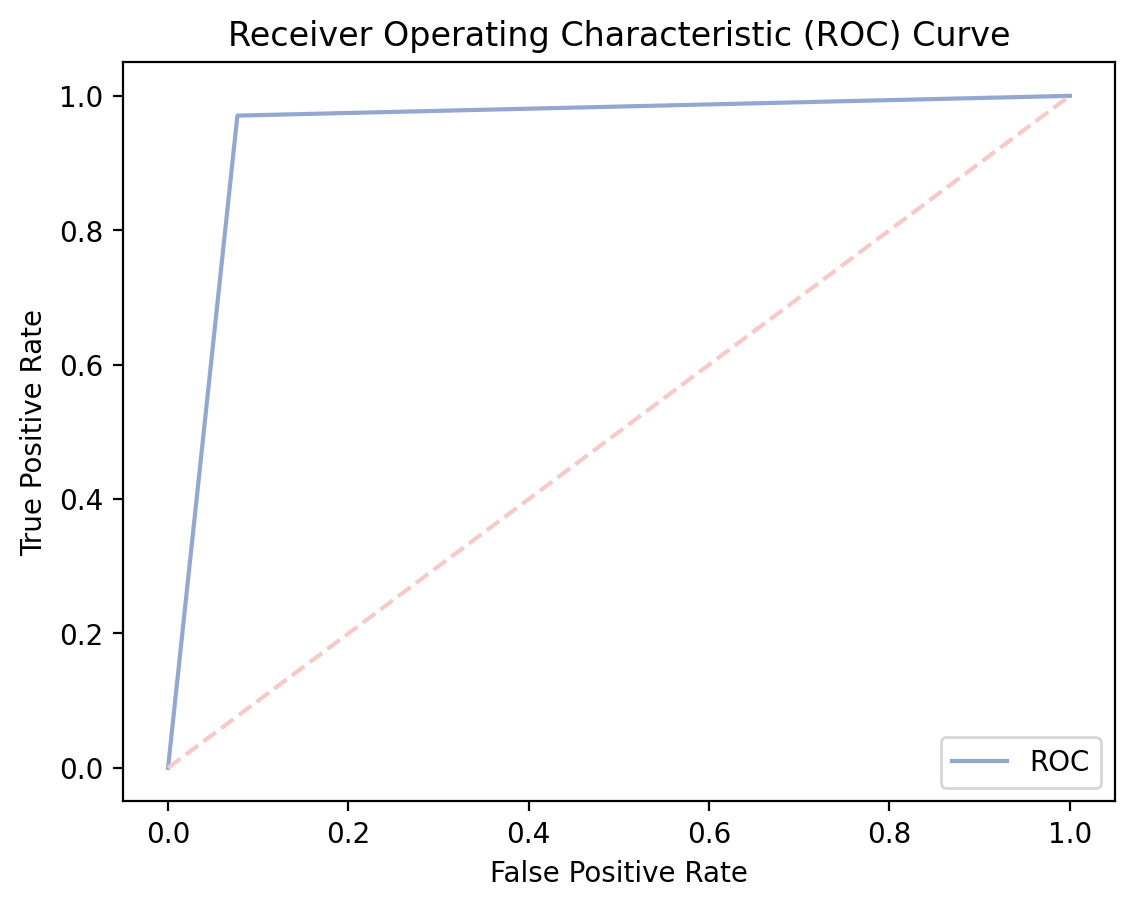

In [ ]:
## roc curve
auc_mod10 = roc_auc_score(y_test, y_pred_ran)
print('AUC: %f' %auc_mod10)

fpr, tpr, _ = roc_curve(y_test, y_pred_ran)
plt.plot(fpr, tpr, color='#92a8d1', label='ROC')
plt.plot([0, 1], [0, 1], color='#f7cac9', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### Measuring the accuracy of the models 

In [ ]:
eval_data = {"Model": ["Logistic Regression", "Naive Bayes", "K-Nearest Neighbours", "Decision Tree (gini)", "Decision Tree (entropy)", "Decision Tree (max depth)", "SVM (linear)", "SVM (sigmoid)", "SVM (rbf)", "Random Forest"],
        "Accuracy": [accuracy_LR, accuracy_NB, accuracy_knn, accuracy_gini, accuracy_entropy, accuracy_depth, accuracy_linear, accuracy_sigmoid, accuracy_rbf, accuracy_RF], 
        "AUC": [auc_mod1, auc_mod2, auc_mod3, auc_mod4, auc_mod5, auc_mod6, auc_mod7, auc_mod8, auc_mod9, auc_mod10]}

eval = pd.DataFrame(data=eval_data)

eval.round(2)

,Model,Accuracy,AUC
0,Logistic Regression,0.91,0.91
1,Naive Bayes,0.88,0.88
2,K-Nearest Neighbours,0.92,0.91
3,Decision Tree (gini),0.86,0.87
4,Decision Tree (entropy),0.93,0.94
5,Decision Tree (max depth),0.82,0.83
6,SVM (linear),0.88,0.89
7,SVM (sigmoid),0.85,0.85
8,SVM (rbf),0.92,0.92
9,Random Forest,0.95,0.95


From the data above and the models, Random Forest is the most accurate model. 

### Saving and deploying the model 

In [ ]:
## save my ml model 
import pickle
with open("pcos_model", "wb") as file:
    pickle.dump(ran_for, file)

## deployed model 
## http://localhost:8502


""" user_predict = np.array([[follicle_r, follicle_l, skin, hair_g, weight_g, cycle, fast_food, 
                          pimples, log_AMH_new, weight_kg, bmi, hair_loss, waist, hip, avg_f_size_l, endometrium]])
user_predict = scaler_x.transform(user_predict)
prediction = ran_for.predict(user_predict) """ 

' ## user input \nfollicle_r = float(input("Please enter the amount of follicles on your right ovary"))\nfollicle_l = float(input("Please enter the amount of follicles on your left ovary"))\nskin = input("Have you experienced any skin darkening especially at the folds of your skin? (Y/N)")\nhair_g = input("Do you experience excessive hair growth (hirsutism) (Y/N)")\nweight_g = input("Have you experienced weight gain (Y/N)")\ncycle = input("Is your menstrual cycle regular or irregular? (R/I)")\nfast_food = input("Do you consume fast food? (Y/N)")\npimples = input("Do you have pimples? (Y/N)")\nAMH_input = float(input("Please enter the amount of AMH (ng/mL) in your blood sample"))\nweight_kg = float(input("Please enter how much you weight in kg"))\nbmi = float(input("Please enter your BMI"))\nhair_loss = input("Do you experience hair loss? (Y/N)")\nwaist = float(input("Please enter the measurement of your waist in inches"))\nhip = float(input("Please enter the measurement of your hip in 

### Exploratory data analysis

In [ ]:
## colours = 
#d0e1ff
#f7cac9
#92a8d1
#e6eeff
#ffecec

In [ ]:
pcos_data.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'log_AMH(ng/mL)'],
      dtype='object')

In [ ]:
pcos_data["Blood Group"].unique()

array([15, 11, 13, 17, 16, 12, 14, 18])

In [ ]:
""" Target variable = PCOS (Y/N)

Numerical variables:
   Age (yrs), Weight (Kg), Height(Cm), BMI, Pulse rate(bpm), RR (breaths/min), HB(g/dl), Cycle length(days), Marraige Status (Yrs), No. of aborptions,
   I   beta-HCG(mIU/mL), II    beta-HCG(mIU/mL), FSH(mIU/mL), LH(mIU/mL), FSH/LH, Hip(inch)Waist(inch), Waist:Hip Ratio, TSH (mIU/L), AMH(ng/mL), 
   PRL(ng/mL), Vit D3 (ng/mL), PRG(ng/mL), RBS(mg/dl), BP _Systolic (mmHg), BP _Diastolic (mmHg), Follicle No. (L), Follicle No. (R), Avg. F size (L) (mm), Avg. F size (R) (mm), Endometrium (mm)   

Categorical variables = Blood Group, Cycle(R/I), Pregnant(Y/N), Weight gain(Y/N), hair growth(Y/N), Skin darkening (Y/N), Hair loss(Y/N), Pimples(Y/N), Fast food (Y/N), Reg.Exercise(Y/N),  """

' Target variable = PCOS (Y/N)\n\nNumerical variables:\n   Age (yrs), Weight (Kg), Height(Cm), BMI, Pulse rate(bpm), RR (breaths/min), HB(g/dl), Cycle length(days), Marraige Status (Yrs), No. of aborptions,\n   I   beta-HCG(mIU/mL), II    beta-HCG(mIU/mL), FSH(mIU/mL), LH(mIU/mL), FSH/LH, Hip(inch)Waist(inch), Waist:Hip Ratio, TSH (mIU/L), AMH(ng/mL), \n   PRL(ng/mL), Vit D3 (ng/mL), PRG(ng/mL), RBS(mg/dl), BP _Systolic (mmHg), BP _Diastolic (mmHg), Follicle No. (L), Follicle No. (R), Avg. F size (L) (mm), Avg. F size (R) (mm), Endometrium (mm)   \n\nCategorical variables = Blood Group, Cycle(R/I), Pregnant(Y/N), Weight gain(Y/N), hair growth(Y/N), Skin darkening (Y/N), Hair loss(Y/N), Pimples(Y/N), Fast food (Y/N), Reg.Exercise(Y/N),  '

We will focus on the attributes that are correlated the most with PCOS 

In [ ]:
## Making it easier to see how all the features correlate with PCOS 
corr_pcos_data["PCOS (Y/N)"].sort_values(ascending=False).head(17)

PCOS (Y/N)              1.000000
Follicle No. (R)        0.648327
Follicle No. (L)        0.603346
Skin darkening (Y/N)    0.475733
hair growth(Y/N)        0.464667
Weight gain(Y/N)        0.441047
Cycle(R/I)              0.401644
Fast food (Y/N)         0.376183
Pimples(Y/N)            0.286077
AMH(ng/mL)              0.264141
Weight (Kg)             0.211938
BMI                     0.199697
Hair loss(Y/N)          0.172879
Waist(inch)             0.164598
Hip(inch)               0.162297
Avg. F size (L) (mm)    0.132992
Endometrium (mm)        0.106648
Name: PCOS (Y/N), dtype: float64

How many people have PCOS compared to not? 

In [ ]:
##colour1 = ["#e6eeff", "#f7cac9"]
## sns.countplot(x= pcos_data["PCOS (Y/N)"], palette=colour1)

#then divide pcos/totalx100
## total count 
## PCOS count = total count of how many people have PCOS 
## PCOS % = PCOS/total x100
## Non PCOS = 100 - PCOS% 
## create labels variable and quote PCOS and Non-PCOS 
## sizes variable 

pcos_data["PCOS (Y/N)"].count
pcos_data["PCOS (Y/N)" == 1]



KeyError: False

In [ ]:
## distinguish attributes 
## univariate analysis 
## bivariate analysis 
## multivariate stats 
## detect interactions among attributes  


How do the highly correlated features (correlations of <0.1>) compare in people with/without PCOS?

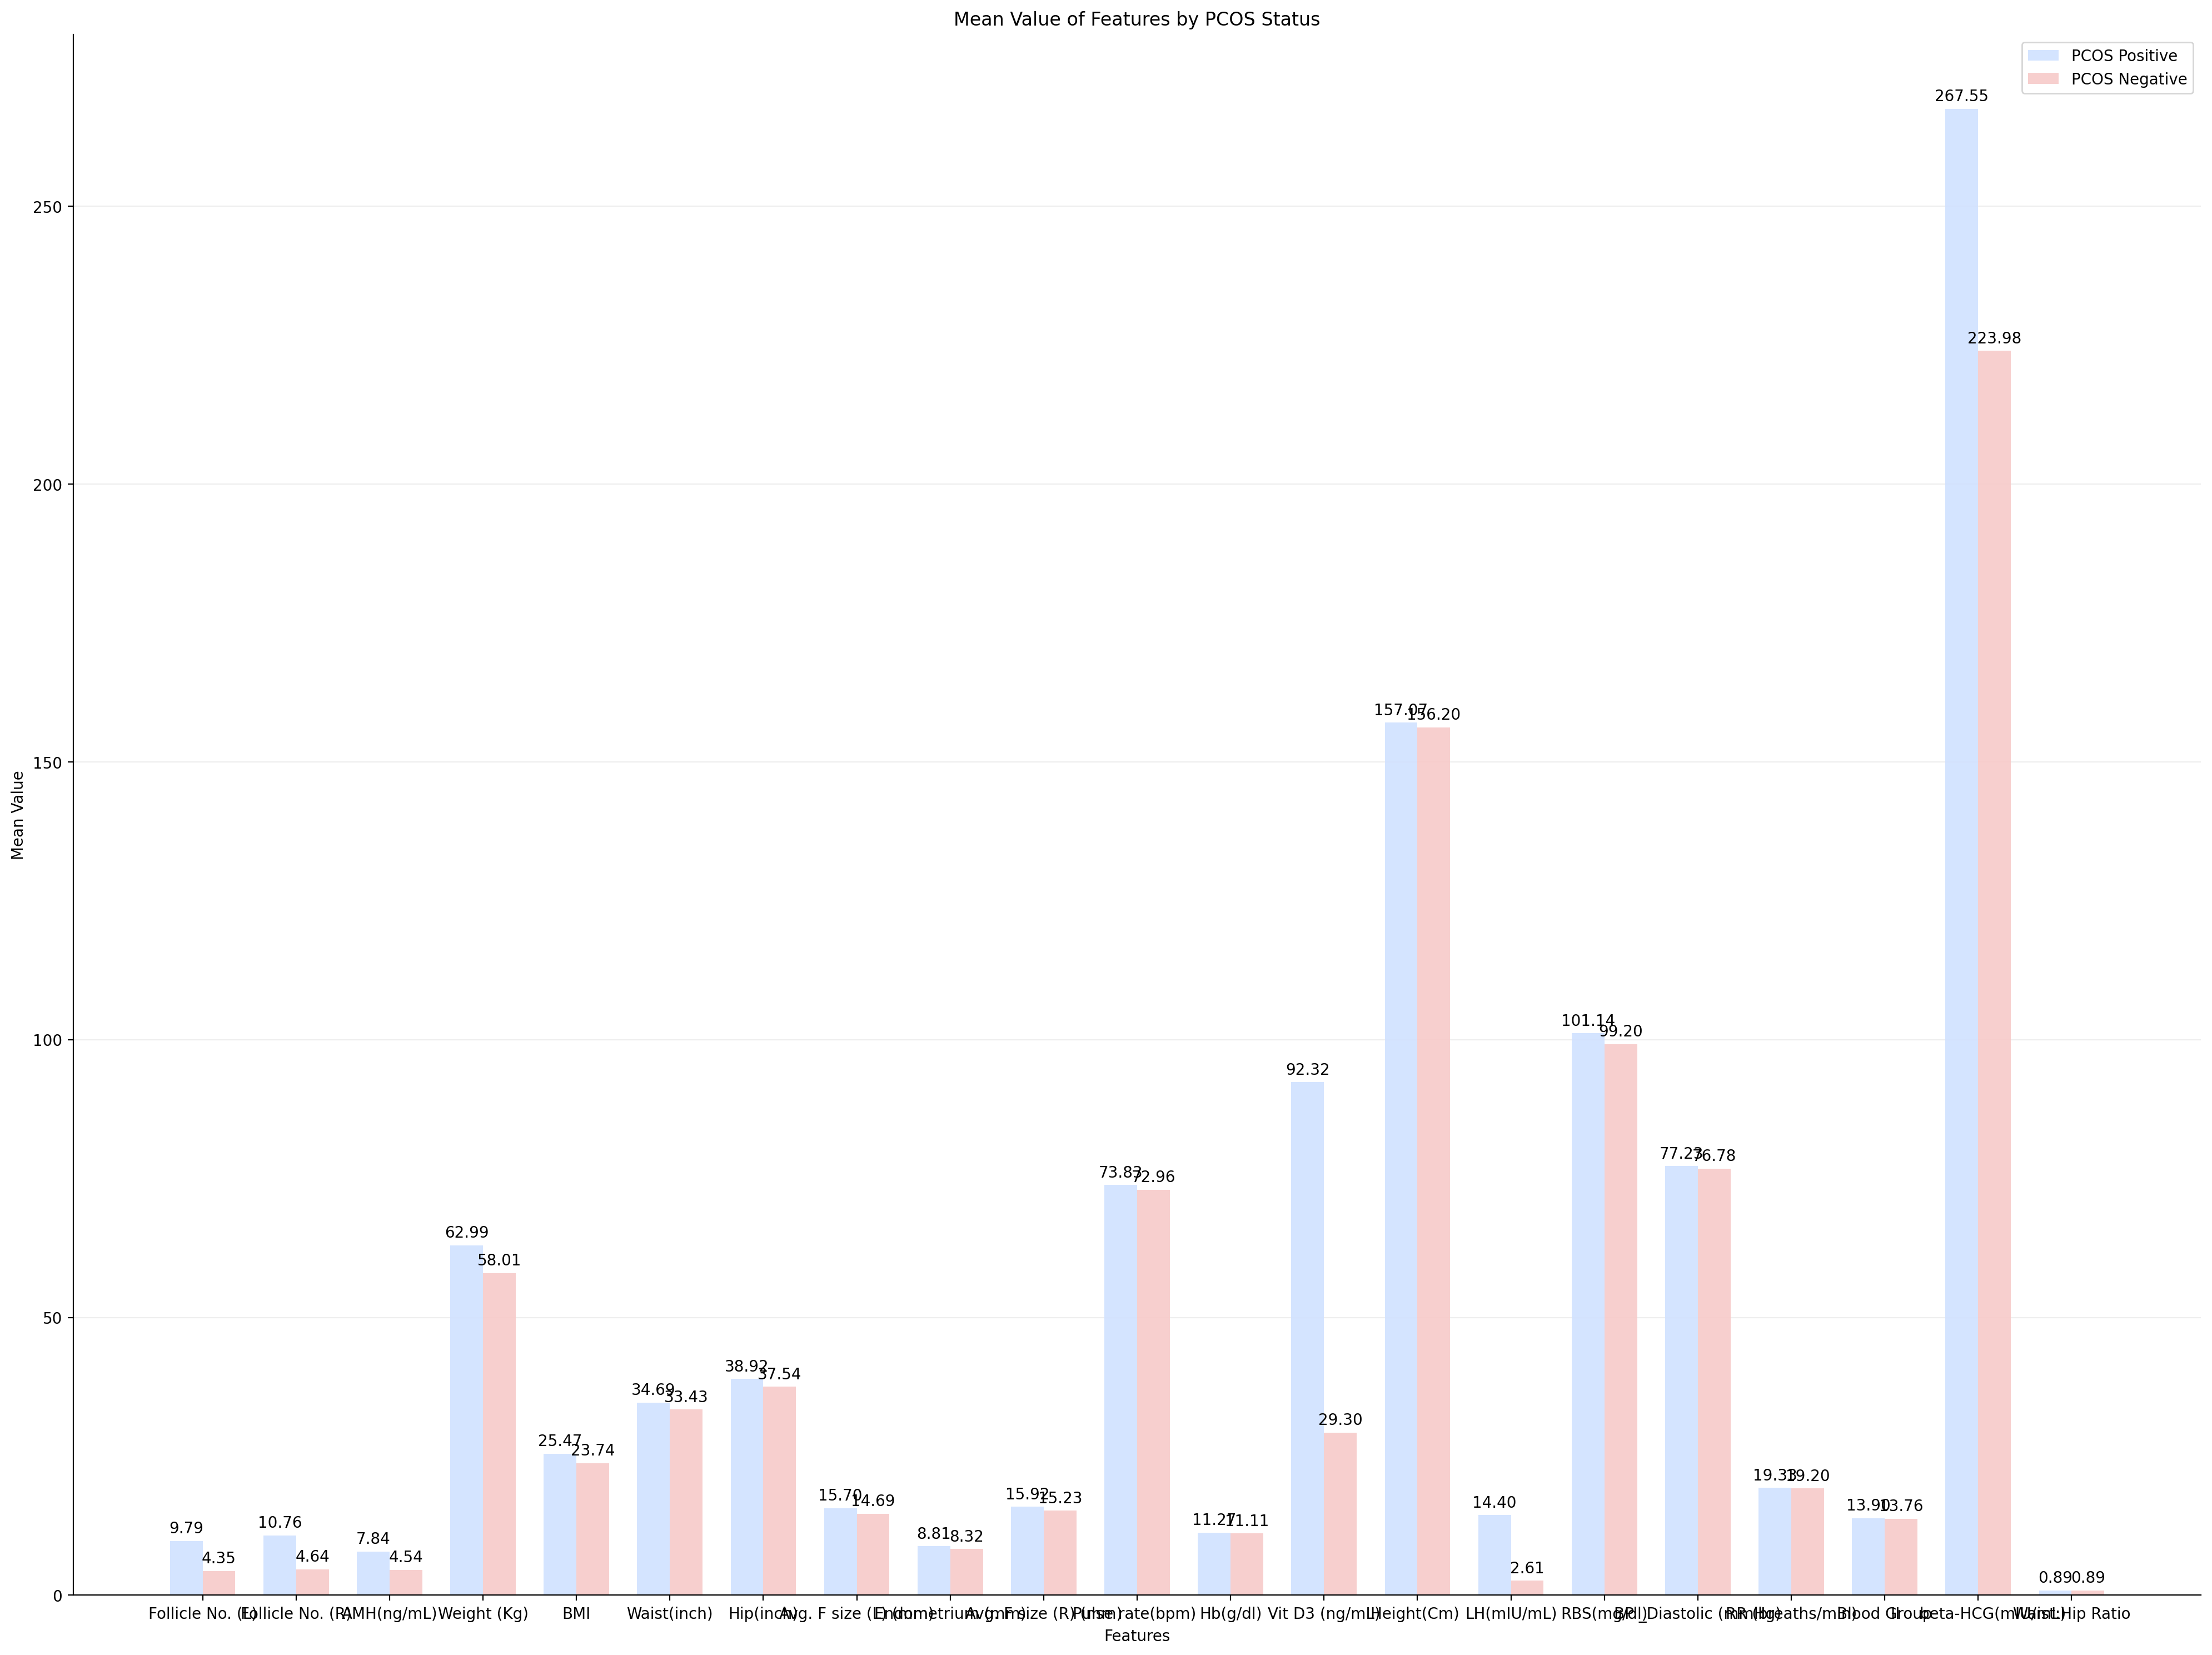

In [ ]:
# Create a subset of the dataset with the highlighted features, add the features you are interested to see to the highlighted features
highlighted_features = ['Follicle No. (L)', "Follicle No. (R)", "AMH(ng/mL)", "Weight (Kg)", "BMI", "Waist(inch)", "Hip(inch)", "Avg. F size (L) (mm)", "Endometrium (mm)", "Avg. F size (R) (mm)", "Pulse rate(bpm) ", "Hb(g/dl)", "Vit D3 (ng/mL)", "Height(Cm) ", "LH(mIU/mL)", "RBS(mg/dl)", "BP _Diastolic (mmHg)", "RR (breaths/min)", "Blood Group", "II    beta-HCG(mIU/mL)", "Waist:Hip Ratio"]  
subset = pcos_data[['PCOS (Y/N)'] + highlighted_features]

# Separate the data based on PCOS status
pcos_positive = subset[subset['PCOS (Y/N)'] == 1]
pcos_negative = subset[subset['PCOS (Y/N)'] == 0]

# Set up the bar chart
fig, ax = plt.subplots(figsize=(20, 15))
bar_width = 0.35
opacity = 0.9


##  I will be using the mean value here
# Calculate the mean values for PCOS positive and negative groups
mean_pcos_positive = pcos_positive[highlighted_features].mean().values
mean_pcos_negative = pcos_negative[highlighted_features].mean().values

# Plot the features for PCOS positive group
index = np.arange(len(highlighted_features))
bar1 = ax.bar(index, mean_pcos_positive, bar_width, alpha=opacity, color='#d0e1ff', label='PCOS Positive')

# Plot the features for PCOS negative group
bar2 = ax.bar(index + bar_width, mean_pcos_negative, bar_width, alpha=opacity, color='#f7cac9', label='PCOS Negative')

# label the plot
ax.set_xlabel('Features')
ax.set_ylabel('Mean Value')
ax.set_title('Mean Value of Features by PCOS Status')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(highlighted_features)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False) 
ax.set_axisbelow(True)
%config InlineBackend.figure_format='retina'

ax.legend()

# Add value labels for PCOS positive group
for rect in bar1:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

# Add value labels for PCOS negative group
for rect in bar2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
colour = ["#9EABC5", "#EBDBBD"]
sns.lmplot(x="Cycle length(days)", hue="PCOS (Y/N)", data=pcos_data, palette=colour)

KeyError: '[None] not in index'

In [ ]:
pcos_data["Cycle(R/I)"].unique()

array([2, 4, 5])

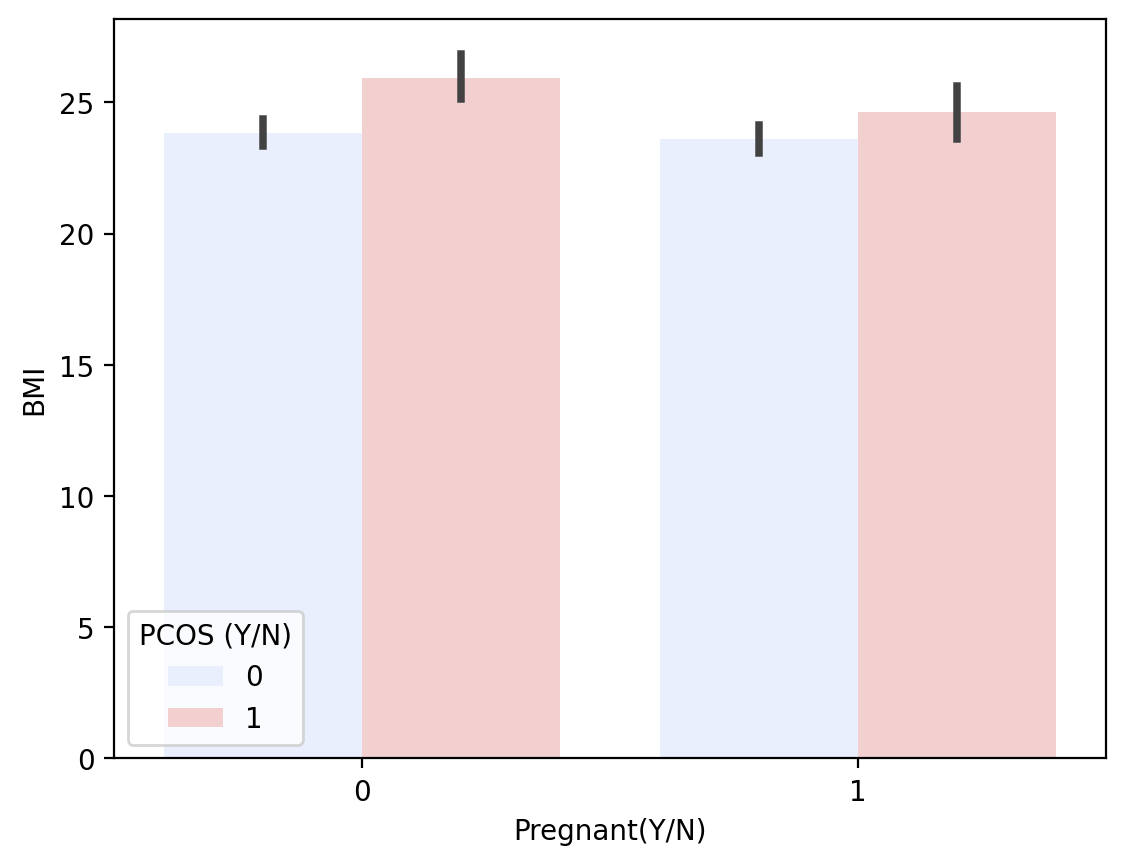

In [ ]:
colour_line =["#e6eeff", "#f7cac9"]
fig_bar = sns.barplot(data=pcos_data, hue = "PCOS (Y/N)", x = "Pregnant(Y/N)", y ="BMI", palette = colour_line)
plt.show(fig_bar)

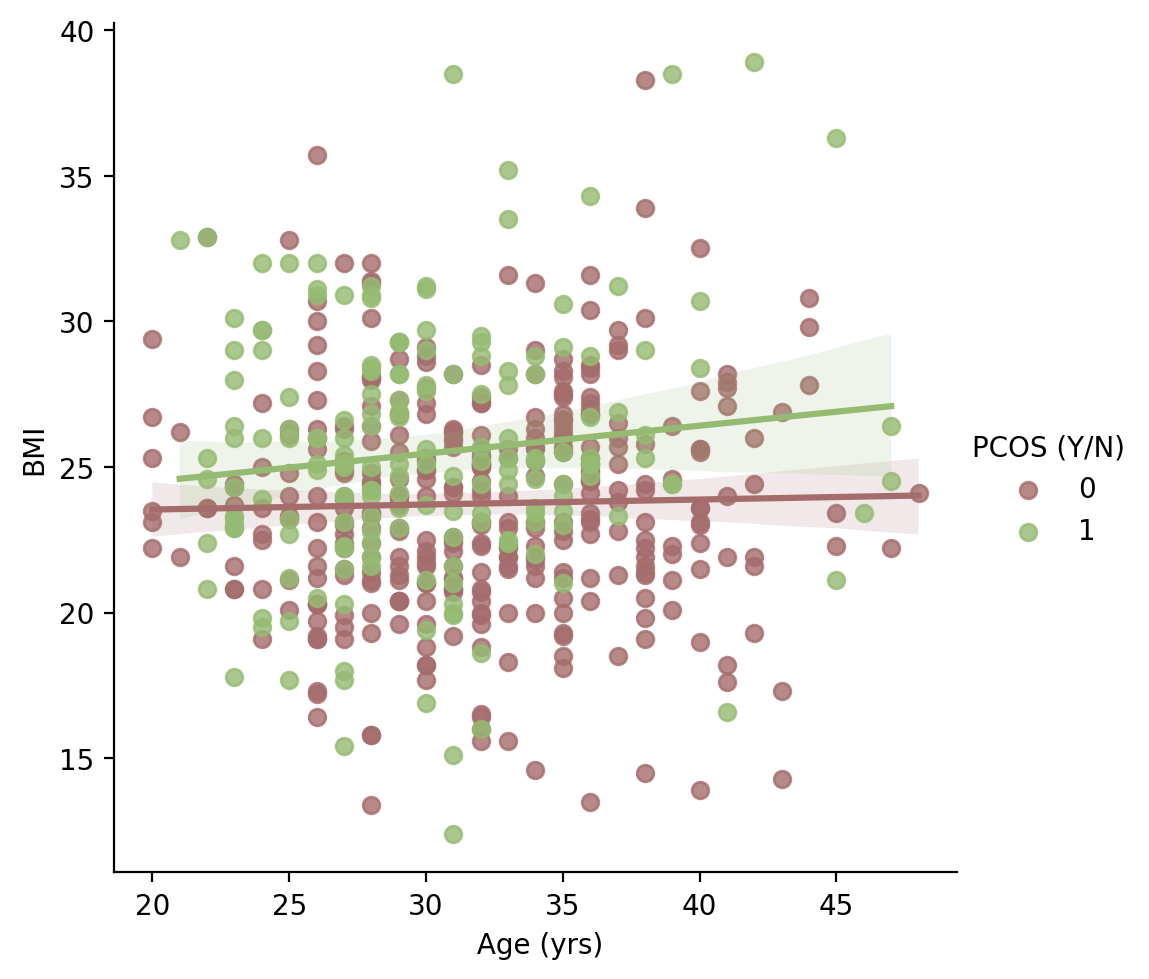

In [ ]:
## visualising weight gain over the years with/without PCOS
colour = ["#A56C6C", "#95bb72"]
#sns.set_style("whitegrid", {"grid.color": "0.9"})
fig = sns.lmplot(data=pcos_data, x = " Age (yrs)", y = "BMI", hue = "PCOS (Y/N)", palette = colour)
plt.show(fig)
%config InlineBackend.figure_format='retina' 

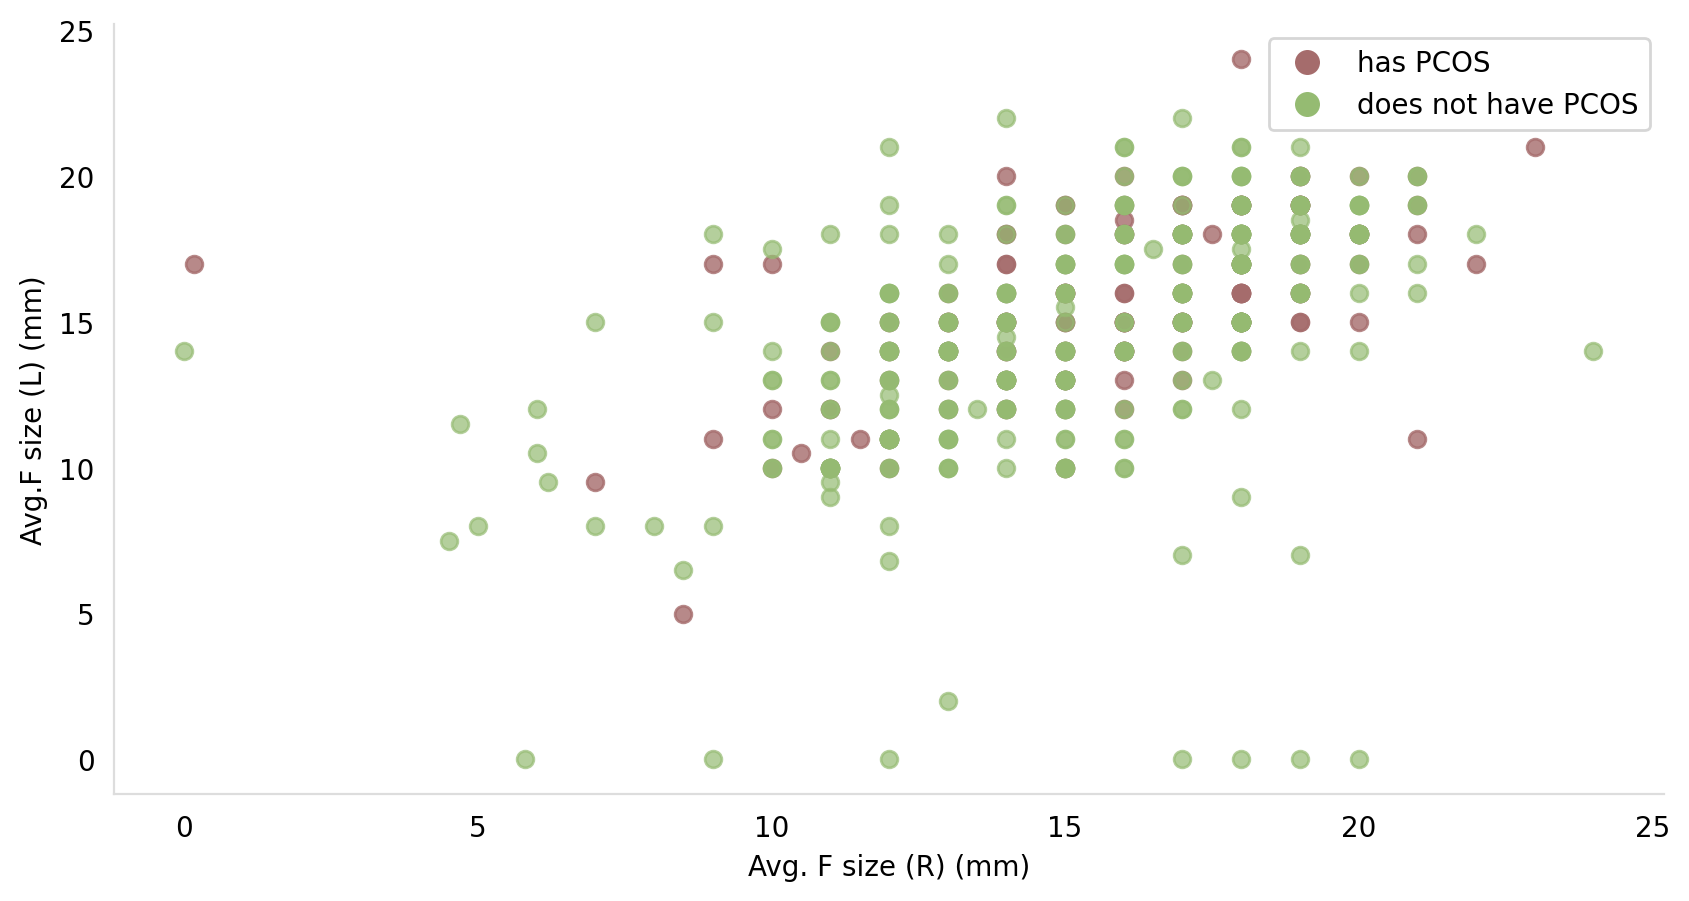

In [ ]:
## visualising whether someone has PCOS based on the their avg follicle size 
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
fig,ax = plt.subplots(figsize=(10,5))
ax.scatter(pcos_data[pcos_data["PCOS (Y/N)"]==1]["Avg. F size (R) (mm)"], pcos_data[pcos_data["PCOS (Y/N)"]==1]["Avg. F size (L) (mm)"], c="#A56C6C", alpha=0.8)
ax.scatter(pcos_data[pcos_data["PCOS (Y/N)"]==0]["Avg. F size (R) (mm)"], pcos_data[pcos_data["PCOS (Y/N)"]==0]["Avg. F size (L) (mm)"], c="#95bb72", alpha=0.7)
ax.set_xlabel("Avg. F size (R) (mm)")
ax.set_ylabel("Avg.F size (L) (mm)")
color_patches = [
    Line2D([0], [0], marker='o', color='w', label='has PCOS', markerfacecolor="#A56C6C", markersize=10),
    Line2D([0], [0], marker='o', color='w', label='does not have PCOS', markerfacecolor='#95bb72', markersize=10)
]
ax.legend(handles=color_patches)
%config InlineBackend.figure_format='retina'
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#DDDDDD")
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
plt.show()


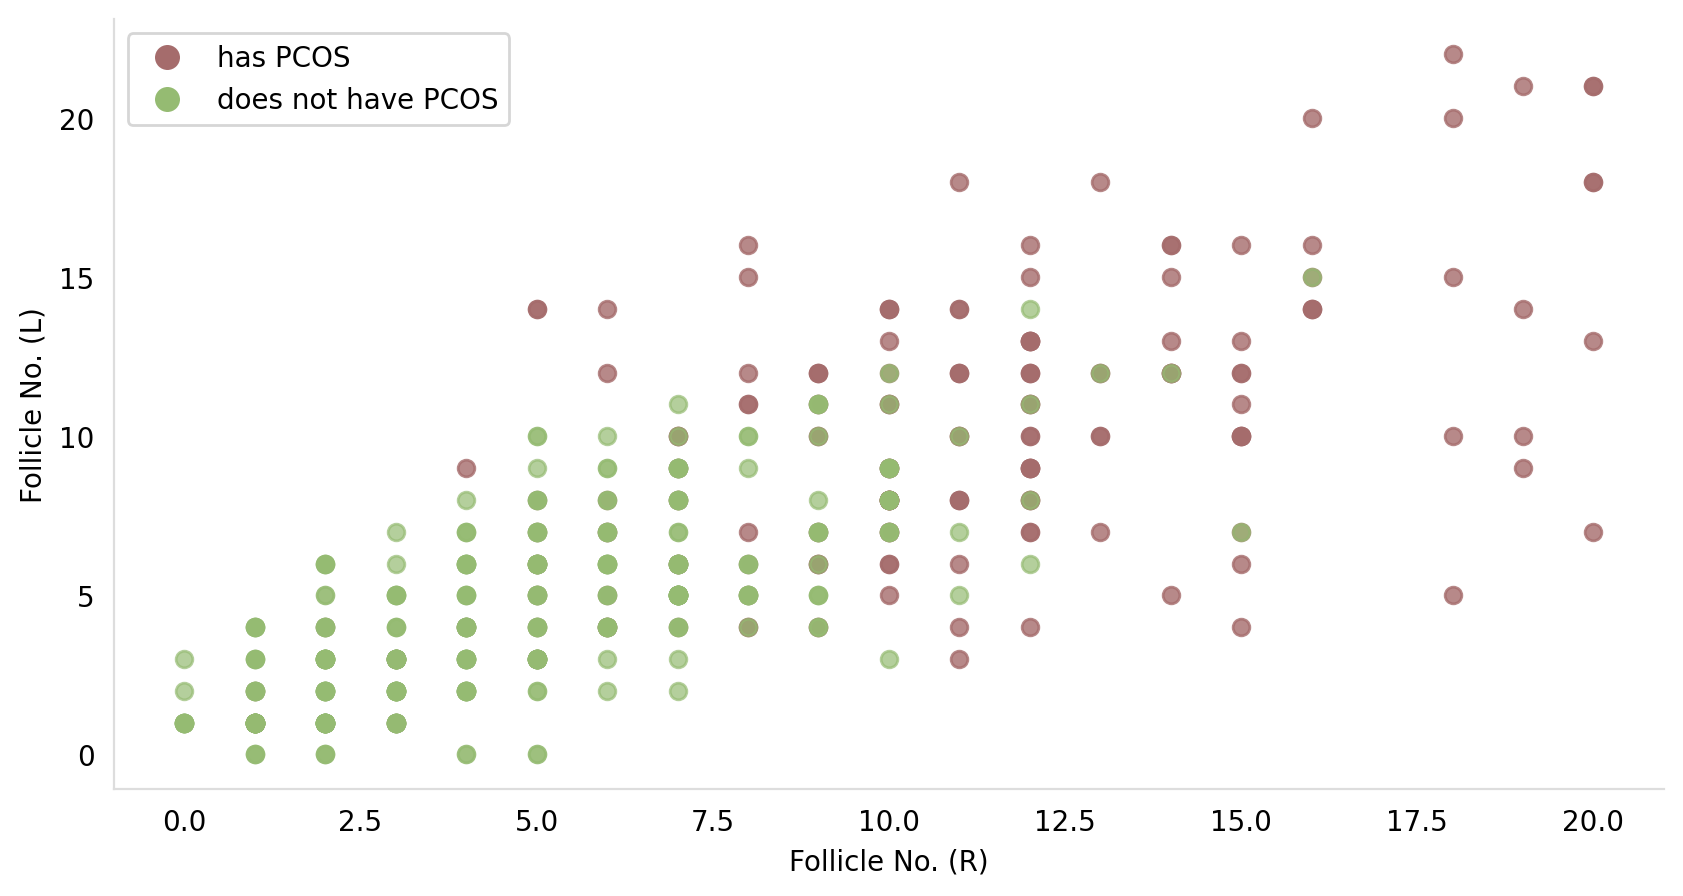

In [ ]:
## visualising whether someone has PCOS based on their follice numbers 
fig,ax = plt.subplots(figsize=(10,5))
ax.scatter(pcos_data[pcos_data["PCOS (Y/N)"]==1]["Follicle No. (R)"], pcos_data[pcos_data["PCOS (Y/N)"]==1]["Follicle No. (L)"], c="#A56C6C", alpha=0.8)
ax.scatter(pcos_data[pcos_data["PCOS (Y/N)"]==0]["Follicle No. (R)"], pcos_data[pcos_data["PCOS (Y/N)"]==0]["Follicle No. (L)"], c="#95bb72", alpha=0.7)
ax.set_xlabel("Follicle No. (R)")
ax.set_ylabel("Follicle No. (L)")
color_patches = [
    Line2D([0], [0], marker='o', color='w', label='has PCOS', markerfacecolor="#A56C6C", markersize=10),
    Line2D([0], [0], marker='o', color='w', label='does not have PCOS', markerfacecolor='#95bb72', markersize=10)
]
ax.legend(handles=color_patches)
%config InlineBackend.figure_format='retina'
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#DDDDDD")
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
plt.show()

In [ ]:
""" ## Weight vs Follicle No. (L)
fig,ax = plt.subplots(figsize=(10,5))
ax.scatter(pcos[pcos["PCOS (Y/N)"]==1][" Age (yrs)"], pcos[pcos["PCOS (Y/N)"]==1]["Weight (Kg)"], c="#A56C6C", alpha=0.8)
ax.scatter(pcos[pcos["PCOS (Y/N)"]==0][" Age (yrs)"], pcos[pcos["PCOS (Y/N)"]==0]["Weight (Kg)"], c="#95bb72", alpha=0.7)
ax.set_xlabel(" Age (yrs)")
ax.set_ylabel("Weight (Kg)")
color_patches = [
    Line2D([0], [0], marker='o', color='w', label='has PCOS', markerfacecolor="#A56C6C", markersize=10),
    Line2D([0], [0], marker='o', color='w', label='does not have PCOS', markerfacecolor='#95bb72', markersize=10)
]
ax.legend(handles=color_patches)
%config InlineBackend.figure_format='retina'
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#DDDDDD")
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True) """


' ## Weight vs Follicle No. (L)\nfig,ax = plt.subplots(figsize=(10,5))\nax.scatter(pcos[pcos["PCOS (Y/N)"]==1][" Age (yrs)"], pcos[pcos["PCOS (Y/N)"]==1]["Weight (Kg)"], c="#A56C6C", alpha=0.8)\nax.scatter(pcos[pcos["PCOS (Y/N)"]==0][" Age (yrs)"], pcos[pcos["PCOS (Y/N)"]==0]["Weight (Kg)"], c="#95bb72", alpha=0.7)\nax.set_xlabel(" Age (yrs)")\nax.set_ylabel("Weight (Kg)")\ncolor_patches = [\n    Line2D([0], [0], marker=\'o\', color=\'w\', label=\'has PCOS\', markerfacecolor="#A56C6C", markersize=10),\n    Line2D([0], [0], marker=\'o\', color=\'w\', label=\'does not have PCOS\', markerfacecolor=\'#95bb72\', markersize=10)\n]\nax.legend(handles=color_patches)\n%config InlineBackend.figure_format=\'retina\'\nax.spines[\'top\'].set_visible(False)\nax.spines[\'right\'].set_visible(False)\nax.spines[\'left\'].set_color("#DDDDDD")\nax.spines[\'bottom\'].set_color(\'#DDDDDD\')\nax.tick_params(bottom=False, left=False)\nax.set_axisbelow(True) '

In [ ]:
## does PCOS affect menstrual cycle?
## age distribution of people with PCOS 

In [ ]:
## can do describe with each column - check linkedin saved 